___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
pip install scikit-plot

In [2]:
!pip install transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 73.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 40.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 72.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 95.1 MB/s eta 0:00:00


In [ ]:
!pip install -q tf-models-official

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split ,GridSearchCV ,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, log_loss, recall_score, accuracy_score, precision_score, f1_score ,make_scorer,average_precision_score
from sklearn.metrics import roc_curve,auc
from mlxtend.plotting import plot_confusion_matrix

from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer

from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from scikitplot.metrics import plot_roc, plot_precision_recall

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import PrecisionRecallDisplay


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout ,LSTM
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Recall
from transformers import AutoTokenizer

import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer


from transformers import TFAutoModel #TFBertModel
from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
from tensorflow.keras import Model
from wordcloud import WordCloud
import warnings
warnings.filterwarnings("ignore")

In [5]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

### Data Wrangling

In [6]:
df = pd.read_csv('/content/Womens Clothing E-Commerce Reviews.csv')
df.head()

Unnamed: 0  Clothing ID   Age                    Title  \
0           0          767  33.0                      NaN   
1           1         1080  34.0                      NaN   
2           2         1077  60.0  Some major design flaws   
3           3         1049  50.0         My favorite buy!   
4           4          847  47.0         Flattering shirt   

                                         Review Text  Rating  Recommended IND  \
0  Absolutely wonderful - silky and sexy and comf...     4.0              1.0   
1  Love this dress!  it's sooo pretty.  i happene...     5.0              1.0   
2  I had such high hopes for this dress and reall...     3.0              0.0   
3  I love, love, love this jumpsuit. it's fun, fl...     5.0              1.0   
4  This shirt is very flattering to all due to th...     5.0              1.0   

   Positive Feedback Count   Division Name Department Name Class Name  
0                      0.0       Initmates        Intimate  Intimates  
1                      4.0         General         Dresses    Dresses  
2                      0.0         General         Dresses    Dresses  
3                      0.0  General Petite         Bottoms      Pants  
4                      6.0         General            Tops    Blouses

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20333 entries, 0 to 20332
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               20333 non-null  int64  
 1   Clothing ID              20333 non-null  int64  
 2   Age                      20332 non-null  float64
 3   Title                    17030 non-null  object 
 4   Review Text              19602 non-null  object 
 5   Rating                   20332 non-null  float64
 6   Recommended IND          20332 non-null  float64
 7   Positive Feedback Count  20332 non-null  float64
 8   Division Name            20322 non-null  object 
 9   Department Name          20322 non-null  object 
 10  Class Name               20322 non-null  object 
dtypes: float64(4), int64(2), object(5)
memory usage: 1.7+ MB


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [ ]:
df.describe().T

count          mean          std   min      25%  \
Unnamed: 0               23486.0  11742.500000  6779.968547   0.0  5871.25   
Clothing ID              23486.0    918.118709   203.298980   0.0   861.00   
Age                      23486.0     43.198544    12.279544  18.0    34.00   
Rating                   23486.0      4.196032     1.110031   1.0     4.00   
Recommended IND          23486.0      0.822362     0.382216   0.0     1.00   
Positive Feedback Count  23486.0      2.535936     5.702202   0.0     0.00   

                             50%       75%      max  
Unnamed: 0               11742.5  17613.75  23485.0  
Clothing ID                936.0   1078.00   1205.0  
Age                         41.0     52.00     99.0  
Rating                       5.0      5.00      5.0  
Recommended IND              1.0      1.00      1.0  
Positive Feedback Count      1.0      3.00    122.0

In [ ]:
df.isnull().sum()

Unnamed: 0                    0
Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df["Review Text"].head()

0    Absolutely wonderful - silky and sexy and comf...
1    Love this dress!  it's sooo pretty.  i happene...
2    I had such high hopes for this dress and reall...
3    I love, love, love this jumpsuit. it's fun, fl...
4    This shirt is very flattering to all due to th...
Name: Review Text, dtype: object

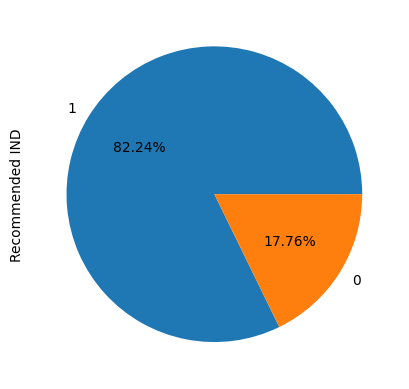

In [ ]:
df['Recommended IND'].value_counts().plot.pie(autopct = '%.2f%%');

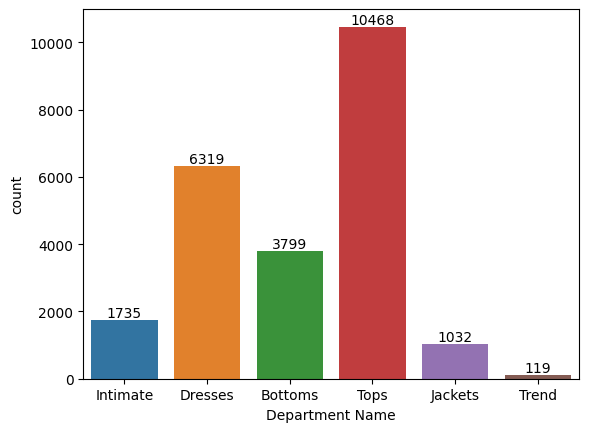

In [ ]:
ax = sns.countplot(data =df, x ="Department Name")
ax.bar_label(ax.containers[0]);
# show Department Name col

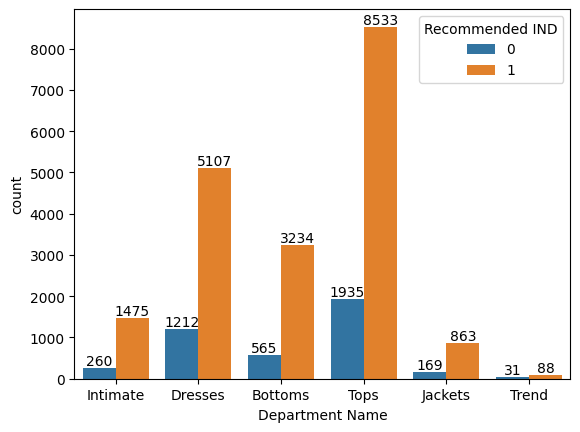

In [ ]:
ax = sns.countplot(data = df, x ="Department Name", hue = "Recommended IND")
for p in ax.containers:
    ax.bar_label(p)
# show Recommended for each kind in Department Name

----------------------------------------------------------------
----------------------------------------------------------------
## We can see (pic below) there is no rule/correlation saying if the rating is high then the product is recommended and if not it is not.
- but for the mean, we can say that products have mean rating below 2 not recommended and those above 4 recommended

- I will not change the nature of the data to create a correlation between rating and recommended, considering the data to be correct. In addition opinions may be conflicting, for example," The shirt is very beautiful I lovet, but I do not recommend it because it high price against fabric "
----------------------------------------------------------------
----------------------------------------------------------------

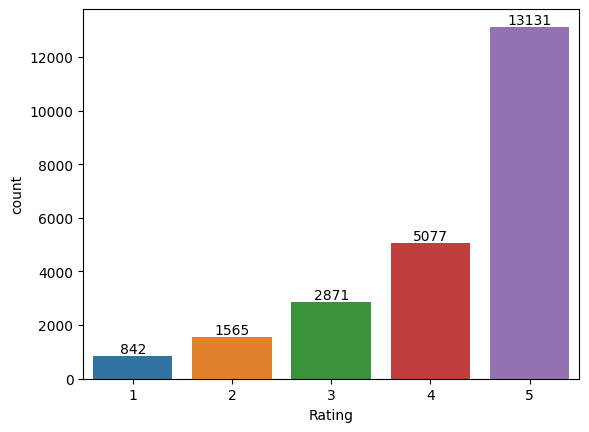

In [ ]:
ax = sns.countplot(data =df, x ="Rating")
ax.bar_label(ax.containers[0]);
# show Rating col

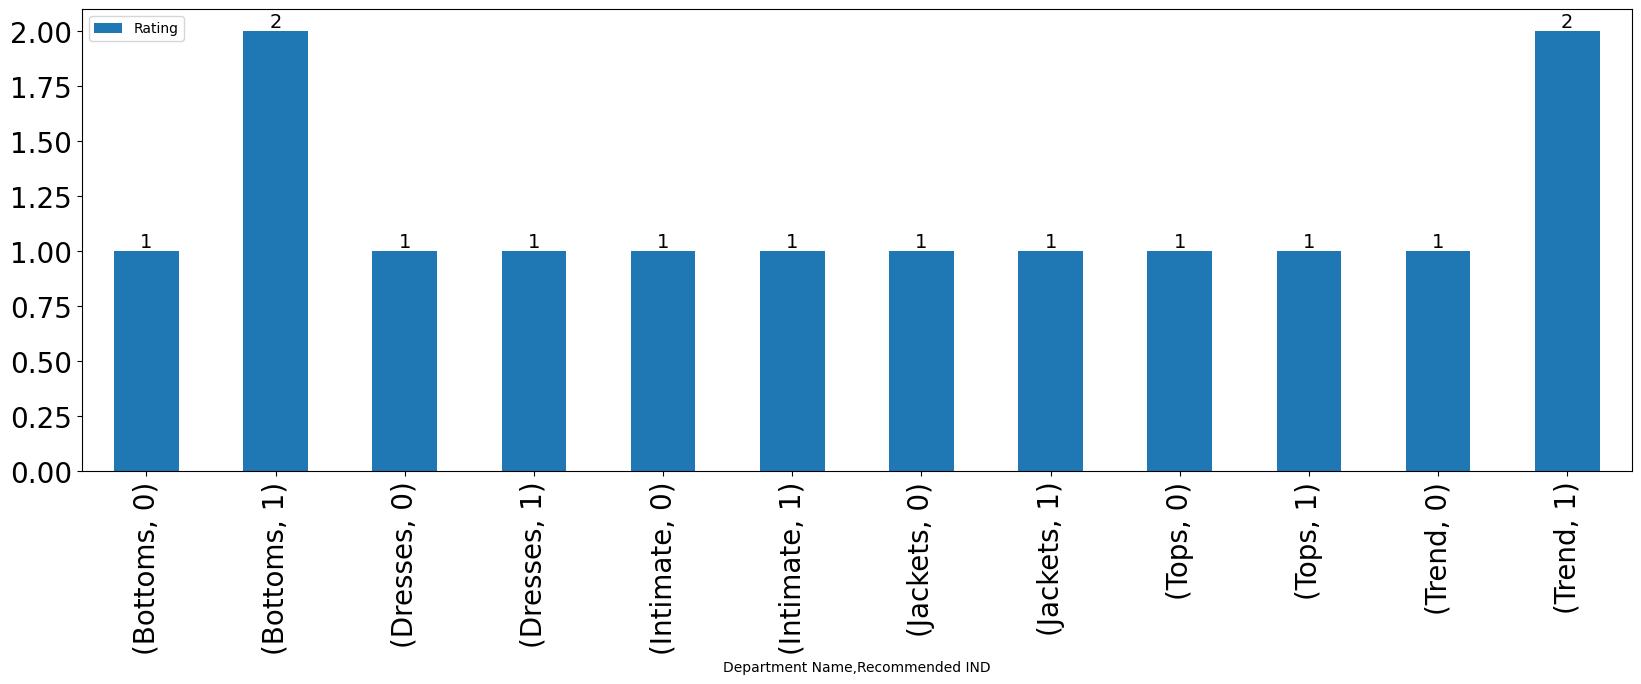

In [ ]:
ax = df[['Rating' ,'Department Name','Recommended IND']].groupby(['Department Name',"Recommended IND"]).min().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

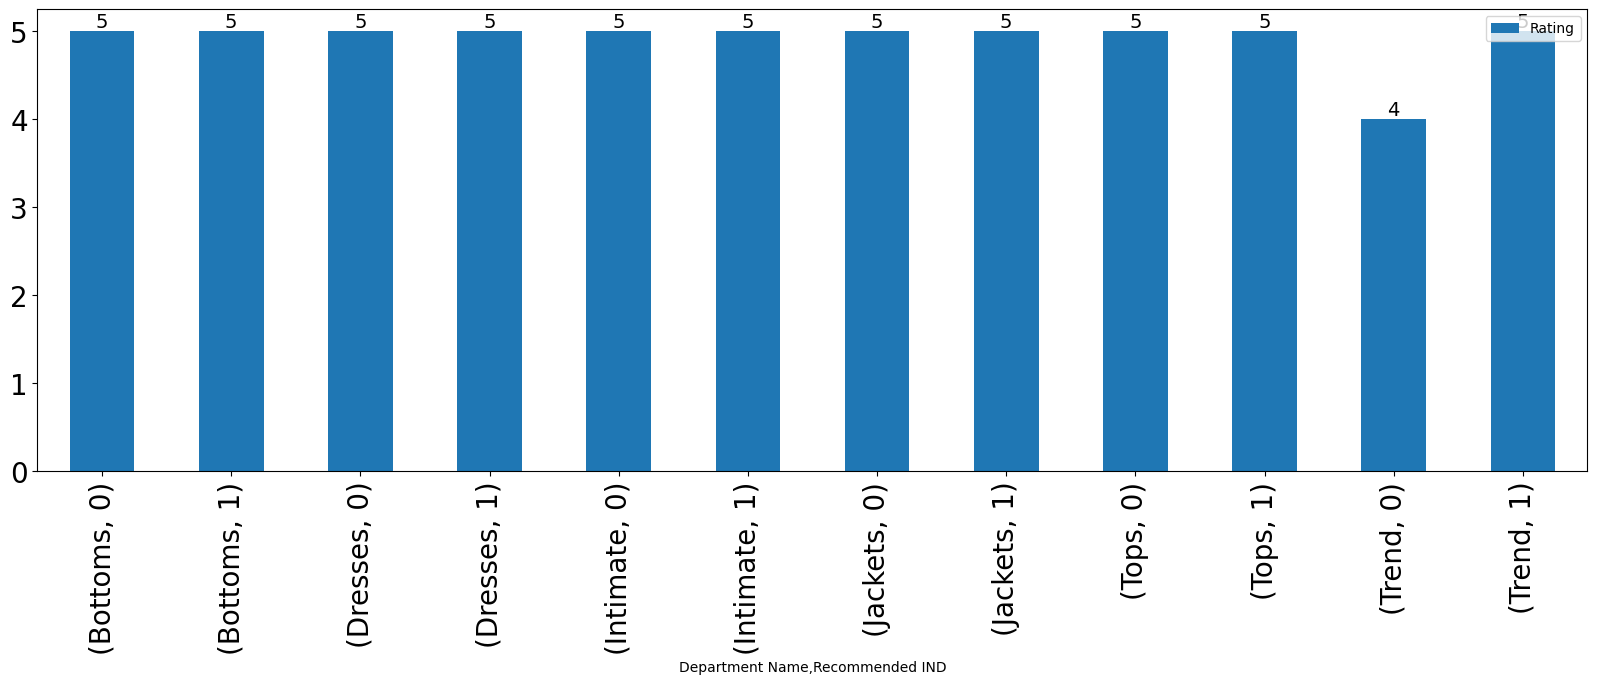

In [ ]:
ax = df[['Rating' ,'Department Name','Recommended IND']].groupby(['Department Name',"Recommended IND"]).max().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

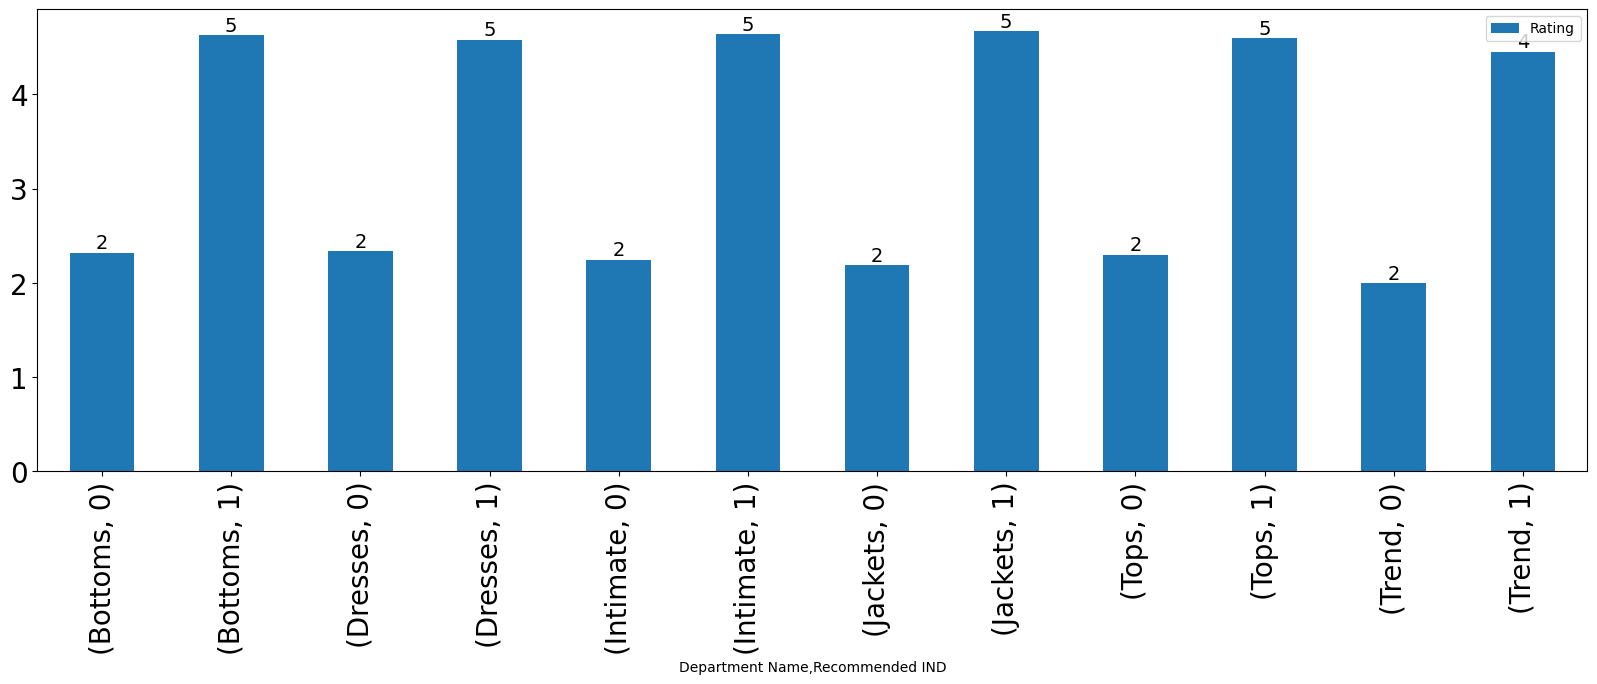

In [ ]:
ax = df[['Rating' ,'Department Name','Recommended IND']].groupby(['Department Name',"Recommended IND"]).mean().plot(kind="bar",figsize=(20,6),fontsize=20)
for p in ax.containers:
    ax.bar_label(p, fmt="%.0f", size=14)

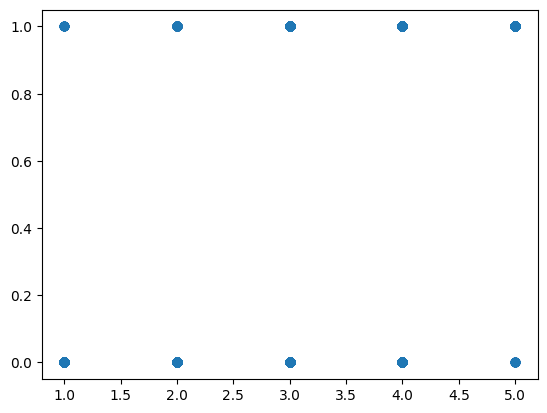

In [ ]:
plt.scatter(df["Rating"] ,df['Recommended IND'] )

----------------------------------------------------------------

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

### Missing Value Detection

In [8]:
df2 = df.copy()
df2 = df2[['Review Text','Recommended IND']]

In [9]:
df2.rename(columns={'Recommended IND': 'Recommended' , 'Review Text': 'Text' }, inplace=True)

In [10]:
df2.isnull().sum()

Text           731
Recommended      1
dtype: int64

In [11]:
df2.dropna(subset=['Text'], inplace=True)
df2.isnull().sum()

Text           0
Recommended    0
dtype: int64

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
for i in range (5):
    print(df2['Text'][i] + "\n")

Absolutely wonderful - silky and sexy and comfortable

Love this dress!  it's sooo pretty.  i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite.  i bought a petite and am 5'8".  i love the length on me- hits just a little below the knee.  would definitely be a true midi on someone who is truly petite.

I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i could not zip it up! i reordered it in petite medium, which was just ok. overall, the top half was comfortable and fit nicely, but the bottom half had a very tight under layer and several somewhat cheap (net) over layers. imo, a major design flaw was the net over layer sewn directly into the zipper - it c

I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!

This shirt i

In [ ]:
stop_words = stopwords.words("english")


In [ ]:
def cleaning(Text):
   # 1. Removing upper brackets
    Text = Text.replace("'", "")
   # 2. Convert to lower & tokenize
    Text_Tokens = word_tokenize(Text.lower())
   # 3. Remove Puncs and numbers
    Text_PuncsOut = [w for w in Text_Tokens if w.isalpha()]
   # 4. Removing Stopwords
    Text_StopWordOut = [w for w in Text_PuncsOut if w not in stop_words]
   # 5. Lemmatization
    Text_Lemma = [WordNetLemmatizer().lemmatize(w) for w in Text_StopWordOut]
   # 6. join Tokenization
    return " ".join( Text_Lemma)

In [ ]:
clean_text = df2['Text'].apply(cleaning)

In [ ]:
for i in range (5):
    print(clean_text[i] + "\n")

absolutely wonderful silky sexy comfortable

love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite

high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c

love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment

shirt flattering due adjustable front tie perfect length wear legging sleeveless pair well cardigan love shirt



In [ ]:
df_clean = pd.concat([clean_text , df2['Recommended'] ],axis= 1 )
df_clean.head()

Text  Recommended
0        absolutely wonderful silky sexy comfortable            1
1  love dress sooo pretty happened find store im ...            1
2  high hope dress really wanted work initially o...            0
3  love love love jumpsuit fun flirty fabulous ev...            1
4  shirt flattering due adjustable front tie perf...            1

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
grouped = df_clean.groupby(df_clean["Recommended"])
df_Pos = grouped.get_group(1)
df_Pos.head()

Text  Recommended
0        absolutely wonderful silky sexy comfortable            1
1  love dress sooo pretty happened find store im ...            1
3  love love love jumpsuit fun flirty fabulous ev...            1
4  shirt flattering due adjustable front tie perf...            1
6  aded basket hte last mintue see would look lik...            1

In [ ]:
grouped = df_clean.groupby(df_clean["Recommended"])
df_Neg = grouped.get_group(0)
df_Neg.head()

Text  Recommended
2   high hope dress really wanted work initially o...            0
5   love tracy reese dress one petite foot tall us...            0
10  dress run small esp zipper area run ordered sp...            0
22  first pullover styling side zipper wouldnt pur...            0
25  loved material didnt really look long dress pu...            0

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Text         22641 non-null  object
 1   Recommended  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.0+ MB


### Collect Words (positive and negative separately)

In [ ]:
all_P = " ".join(df_Pos["Text"])
all_P[:350]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc never would ordered online bc petite bought petite love length hit little knee would definitely true midi someone truly petite love love love jumpsuit fun flirty fabulous every time wear get nothing great compliment shirt flattering due adjustable fron'

In [ ]:
all_N = " ".join(df_Neg["Text"])
all_N[:350]

'high hope dress really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium overall top half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually'

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [ ]:
# These repeat words related to contact but there is no effect on either side pos or neg

custom_stop_words = ['fabric', 'dress' , 'top' , 'buttom' ,'one' , 'style' ,'skirt' ,'shirt', 'color' , 'look' ,'sleeve'
                     ,'black'  ,'white','ordered' ,'jacket','pant' ,'purchased' ,'would','also','material' ,'make','size','blouse','looked'
                     ,'thought', 'even' ,'cut','way','made','shape',"like",'however','may','wear','shoulder' ,'bought' ,'back' ,'front','got'
                     ,'design','store' ,'print','though','jean','tried','fit','since','find','online' ,'see' ,'im','work' ,'arm','could',"get","thing"
                    ,'really','much','usually','bottom','side','chest','line','try','bit','try','photo','hip','picture','think',
                    "sweater",'going',"body" , "maybe",'waist']

In [ ]:
worldcloud_P = WordCloud(background_color="white", max_words =250 ,stopwords=custom_stop_words)
worldcloud_P.generate(all_P)

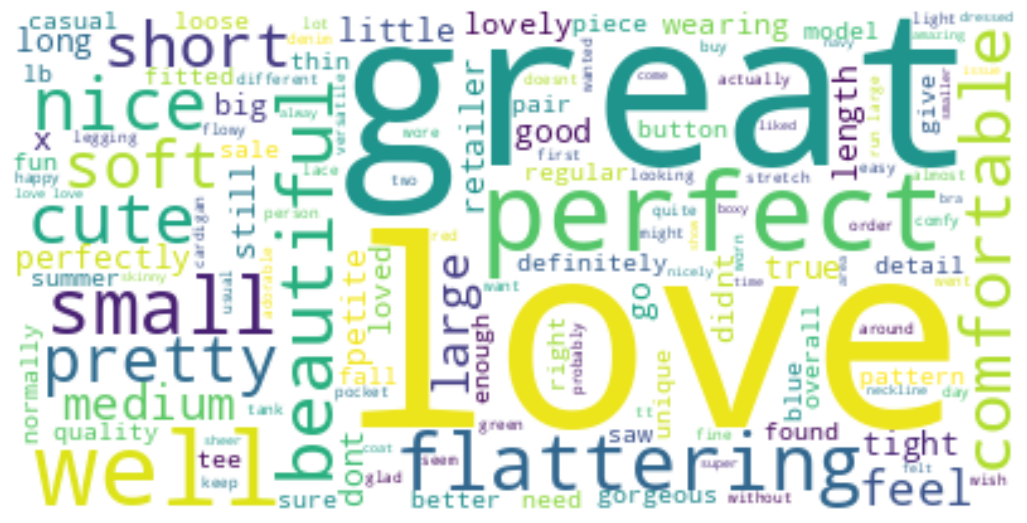

In [ ]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_P, interpolation="bilinear")
plt.axis("off")
plt.show()

In [ ]:
worldcloud_N = WordCloud(background_color="white", max_words =200 ,stopwords=custom_stop_words)
worldcloud_N.generate(all_N)

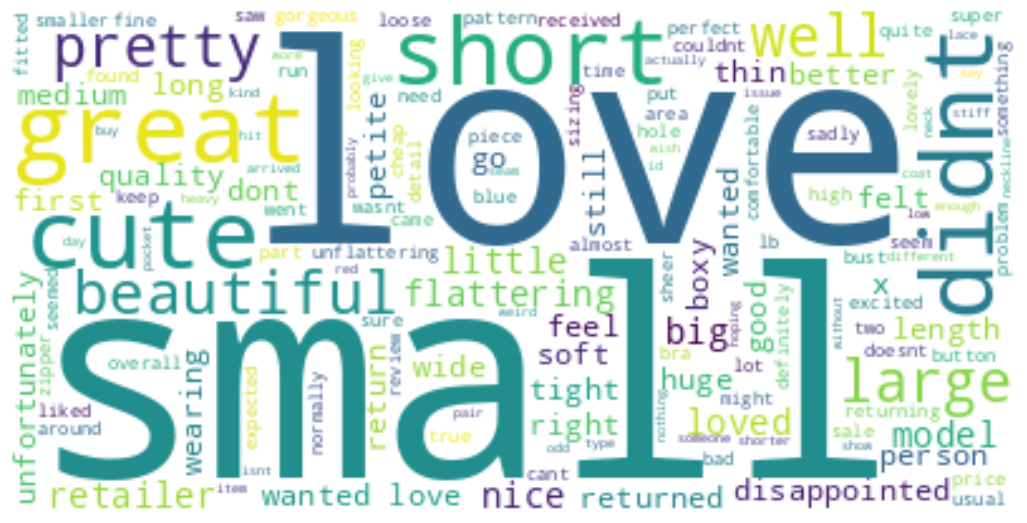

In [ ]:
plt.figure(figsize = (13,13))
plt.imshow(worldcloud_N, interpolation="bilinear")
plt.axis("off")
plt.show()

#Why do we see some positive words in negative content?
#When people write their opinions, they may contain both directions, for example, the fabric so bad, but I loved its color

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [12]:
X= df2["Text"]
y= df2["Recommended"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
vectorizer = CountVectorizer(preprocessor=cleaning, min_df=3)

In [ ]:
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)


In [ ]:
X_train_count.shape , y_train.shape


((18112, 4915), (18112,))

In [ ]:
X_test_count.shape, y_test.shape

((4529, 4915), (4529,))

In [ ]:
df_train_count_vic = pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names_out(),
                              index= X_train.index)
df_test_count_vic = pd.DataFrame(X_test_count.toarray(), columns = vectorizer.get_feature_names_out(),
                              index= X_test.index)

In [ ]:
df_train_count_vic.head(5)

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
1222    0     0        0        0     0    0         0           0   
15835   0     0        0        0     0    0         0           0   
6000    0     0        0        0     0    0         0           0   
13404   0     0        0        0     0    0         0           0   
9098    0     0        0        0     0    0         0           0   

       absolutley  abstract  ...  yucky  yummy  zero  zip  zipped  zipper  \
1222            0         0  ...      0      0     0    0       0       0   
15835           0         0  ...      0      0     0    0       0       0   
6000            0         0  ...      0      0     0    0       0       0   
13404           0         0  ...      0      0     0    0       0       0   
9098            0         0  ...      0      0     0    0       0       0   

       zippered  zipping  zone  zoom  
1222          0        0     0     0  
15835         0        0     0     0  
6000          0        0     0     0  
13404         0        0     0     0  
9098          0        0     0     0  

[5 rows x 4915 columns]

In [ ]:
df_train_count_vic.head(5)

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
1222    0     0        0        0     0    0         0           0   
15835   0     0        0        0     0    0         0           0   
6000    0     0        0        0     0    0         0           0   
13404   0     0        0        0     0    0         0           0   
9098    0     0        0        0     0    0         0           0   

       absolutley  abstract  ...  yucky  yummy  zero  zip  zipped  zipper  \
1222            0         0  ...      0      0     0    0       0       0   
15835           0         0  ...      0      0     0    0       0       0   
6000            0         0  ...      0      0     0    0       0       0   
13404           0         0  ...      0      0     0    0       0       0   
9098            0         0  ...      0      0     0    0       0       0   

       zippered  zipping  zone  zoom  
1222          0        0     0     0  
15835         0        0     0     0  
6000          0        0     0     0  
13404         0        0     0     0  
9098          0        0     0     0  

[5 rows x 4915 columns]

### TF-IDF

In [ ]:
tf_idf_vectorizer = TfidfVectorizer(preprocessor=cleaning,min_df=3)
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)



In [ ]:
X_train_tf_idf.shape , X_test_tf_idf.shape

((18112, 4915), (4529, 4915))

In [ ]:
df_train_tfidf = pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_train.index)
df_test_tfidf = pd.DataFrame(X_test_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names_out(),
                              index= X_test.index)

In [ ]:
df_train_tfidf.head(5)

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
1222   0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
15835  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
6000   0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
13404  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
9098   0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   

       absolutley  abstract  ...  yucky  yummy  zero  zip  zipped  zipper  \
1222          0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
15835         0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
6000          0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
13404         0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
9098          0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   

       zippered  zipping  zone  zoom  
1222        0.0      0.0   0.0   0.0  
15835       0.0      0.0   0.0   0.0  
6000        0.0      0.0   0.0   0.0  
13404       0.0      0.0   0.0   0.0  
9098        0.0      0.0   0.0   0.0  

[5 rows x 4915 columns]

In [ ]:
df_train_tfidf.head(5)

ab  abby  abdomen  ability  able  abo  absolute  absolutely  \
1222   0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
15835  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
6000   0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
13404  0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   
9098   0.0   0.0      0.0      0.0   0.0  0.0       0.0         0.0   

       absolutley  abstract  ...  yucky  yummy  zero  zip  zipped  zipper  \
1222          0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
15835         0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
6000          0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
13404         0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   
9098          0.0       0.0  ...    0.0    0.0   0.0  0.0     0.0     0.0   

       zippered  zipping  zone  zoom  
1222        0.0      0.0   0.0   0.0  
15835       0.0      0.0   0.0   0.0  
6000        0.0      0.0   0.0   0.0  
13404       0.0      0.0   0.0   0.0  
9098        0.0      0.0   0.0   0.0  

[5 rows x 4915 columns]

### Eval Function

In [ ]:
def Eval(model, X_train, y_train, X_test, y_test):

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)

    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix test', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()

    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix train', fontsize=18)
    plt.show()
    print(classification_report(y_train, y_train_pred))

In [ ]:
def Eval_scores(model, X_train, y_train):
    scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}

    scores = cross_validate(model, X_train, y_train, scoring = scoring, cv =5, return_train_score=True ,n_jobs= -1 )
    df_scores = pd.DataFrame(scores, index = range(1,6))
    return df_scores

In [ ]:
def Curve1(model,X_train,y_train,X_test,y_test):
    y_trian = model.predict(X_train)
    y_pred = model.predict(X_test)

    fprt , tprt, _  = roc_curve(y_train ,y_trian)
    vanillaT = auc(fprt,tprt)
    fprx , tprx, _  = roc_curve(y_test ,y_pred)
    vanillaX = auc(fprx,tprx)

    plt.plot(fprt,tprt,lw=2, label = f'Train ROC ( area ={vanillaT:.2f})')
    plt.plot(fprx,tprx,lw=2, label = f'Test ROC ( area ={vanillaX:.2f})')
    plt.plot([0,1],[0,1],lw=2)
    plt.xlabel("FP")
    plt.ylabel("TP")
    plt.legend(loc = "lower right")
    plt.show();

    y_pred_proba = model.predict_proba(X_test)
    plot_precision_recall(y_test, y_pred_proba)
    plt.show();

In [ ]:
scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score, average=None, labels=[0]),
            'recall': make_scorer(recall_score, average=None, labels = [0]),
            'f1': make_scorer(f1_score, average=None, labels = [0])}

# First I use Gridsearch then build model with best parameters

## Logistic Regression

### CountVectorizer

In [ ]:
log_model = LogisticRegression( max_iter=1000, random_state=101)
penalty = ["l1", "l2"]
C = [0.5, 1 ,1.5,]
class_weight= ["balanced", None]
solver = ["lbfgs", "liblinear", "sag", "saga"]
param_grid = {"penalty" : penalty,
              "C" : C,
              "class_weight":class_weight,
              "solver":solver}

log_grid_model = GridSearchCV(estimator=log_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = scoring, refit='f1',#multy scoring does not work we need to specify one metrics only
                          n_jobs = -1)

In [ ]:
%%time
log_grid_model.fit(X_train_count,y_train)

CPU times: total: 1.56 s
Wall time: 50min 44s


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=101),
             n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
log_grid_model.best_params_ , log_grid_model.best_score_

({'C': 0.5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'},
 0.6833425827980422)

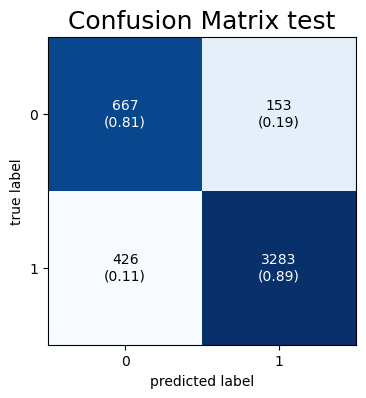

              precision    recall  f1-score   support

           0       0.61      0.81      0.70       820
           1       0.96      0.89      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.81      4529
weighted avg       0.89      0.87      0.88      4529


	Train_Set



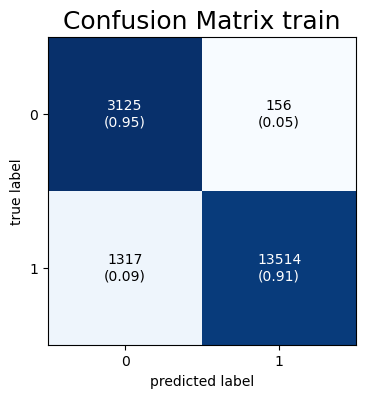

              precision    recall  f1-score   support

           0       0.70      0.95      0.81      3281
           1       0.99      0.91      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.85      0.93      0.88     18112
weighted avg       0.94      0.92      0.92     18112



In [ ]:
Eval(log_grid_model, X_train_count, y_train, X_test_count, y_test)

### Best parameters

In [ ]:
log_model_count = LogisticRegression( max_iter=1000, random_state=101,C =0.5, class_weight='balanced',
                                     penalty= 'l2', solver='lbfgs')

In [ ]:
log_model_count.fit(X_train_count,y_train)

LogisticRegression(C=0.5, class_weight='balanced', max_iter=1000,
                   random_state=101)

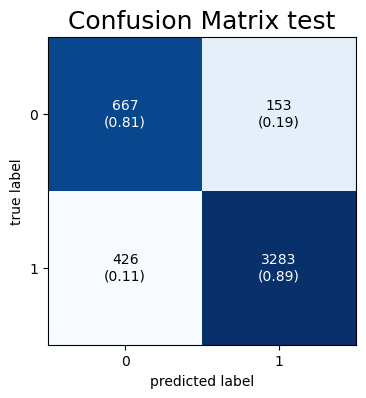

              precision    recall  f1-score   support

           0       0.61      0.81      0.70       820
           1       0.96      0.89      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.85      0.81      4529
weighted avg       0.89      0.87      0.88      4529


	Train_Set



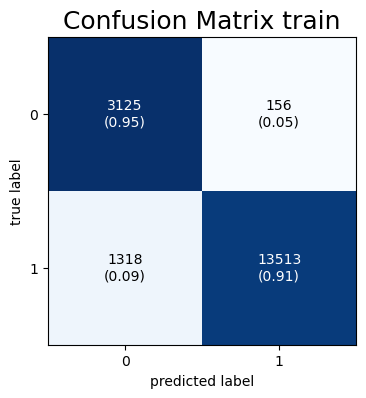

              precision    recall  f1-score   support

           0       0.70      0.95      0.81      3281
           1       0.99      0.91      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.85      0.93      0.88     18112
weighted avg       0.94      0.92      0.92     18112



In [ ]:
Eval(log_model_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
scores_log_count = Eval_scores(log_model_count, X_train_count, y_train)
scores_log_count.mean()[2:]

test_accuracy      0.863406
train_accuracy     0.924083
test_precision     0.593415
train_precision    0.716870
test_recall        0.780569
train_recall       0.960149
test_f1            0.674229
train_f1           0.820862
dtype: float64

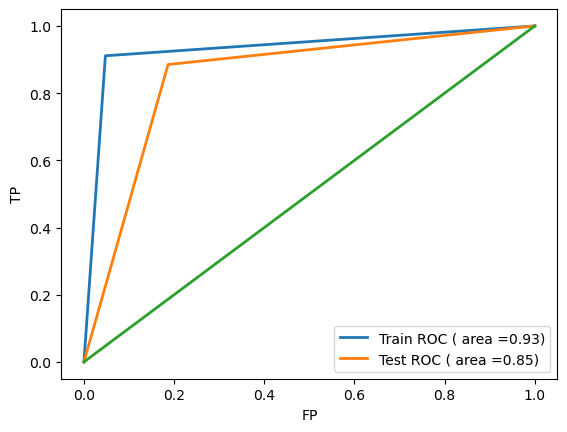

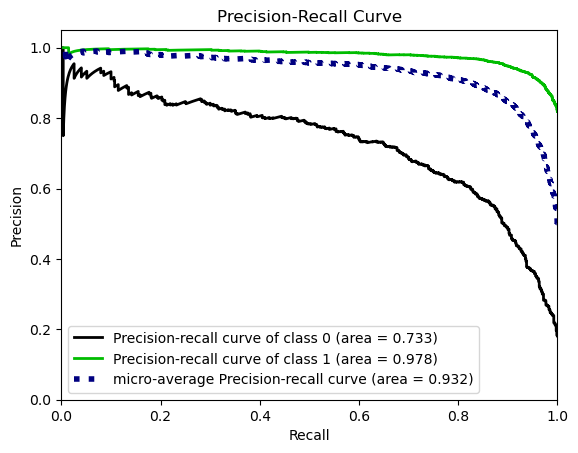

In [ ]:
Curve1(log_model_count,X_train_count,y_train,X_test_count,y_test)

In [ ]:
y_pred = log_model_count.predict(X_test_count)
y_pred_proba= log_model_count.predict_proba(X_test_count)[:,1]

log_ap_count = average_precision_score(y_test, y_pred_proba)
log_count_rec = recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test,y_pred)
log_count_acc = accuracy_score(y_test,y_pred)

### TF-IDF

In [ ]:
%%time
log_grid_model.fit(X_train_tf_idf,y_train)

CPU times: total: 2.31 s
Wall time: 7min 52s


GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1000, random_state=101),
             n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
log_grid_model.best_params_ , log_grid_model.best_score_

({'C': 1.5, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'},
 0.6930030618008849)

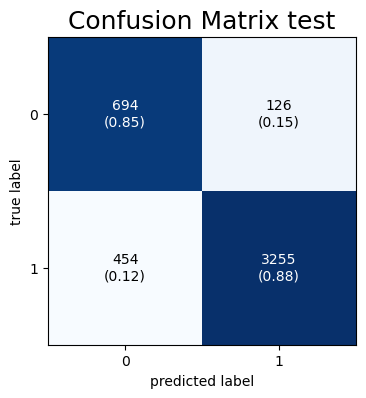

              precision    recall  f1-score   support

           0       0.60      0.85      0.71       820
           1       0.96      0.88      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529


	Train_Set



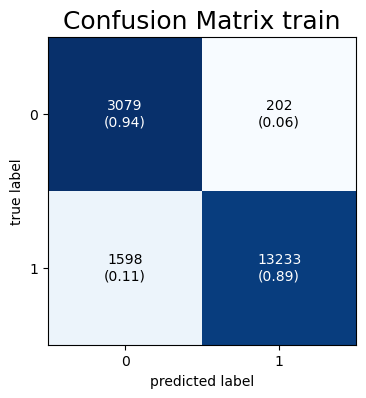

              precision    recall  f1-score   support

           0       0.66      0.94      0.77      3281
           1       0.98      0.89      0.94     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.92      0.86     18112
weighted avg       0.93      0.90      0.91     18112



In [ ]:
Eval(log_grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

### Best parameters

In [ ]:
log_model_tf_idf = LogisticRegression( max_iter=1000, random_state=101,C =1.5, class_weight='balanced',
                                     penalty= 'l2', solver='lbfgs')

In [ ]:
log_model_tf_idf.fit(X_train_tf_idf,y_train)

LogisticRegression(C=1.5, class_weight='balanced', max_iter=1000,
                   random_state=101)

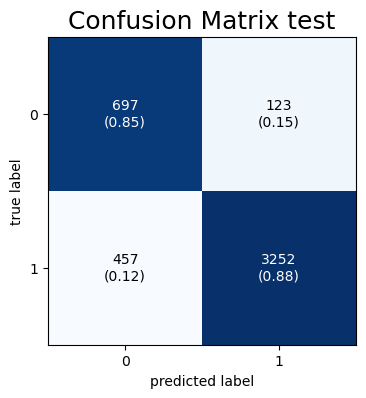

              precision    recall  f1-score   support

           0       0.60      0.85      0.71       820
           1       0.96      0.88      0.92      3709

    accuracy                           0.87      4529
   macro avg       0.78      0.86      0.81      4529
weighted avg       0.90      0.87      0.88      4529


	Train_Set



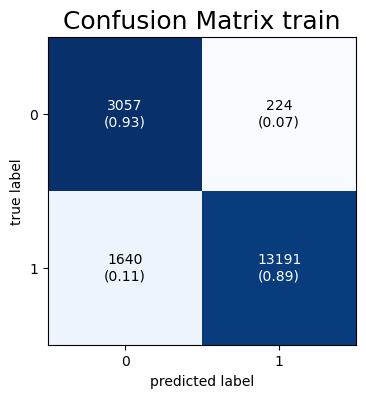

              precision    recall  f1-score   support

           0       0.65      0.93      0.77      3281
           1       0.98      0.89      0.93     14831

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



In [ ]:
Eval(log_model_tf_idf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
scores_log_tf_idf = Eval_scores(log_model_tf_idf, X_train_tf_idf, y_train)
scores_log_tf_idf.mean()[2:]

test_accuracy      0.863074
train_accuracy     0.900908
test_precision     0.586253
train_precision    0.658838
test_recall        0.829636
train_recall       0.939500
test_f1            0.686987
train_f1           0.774524
dtype: float64

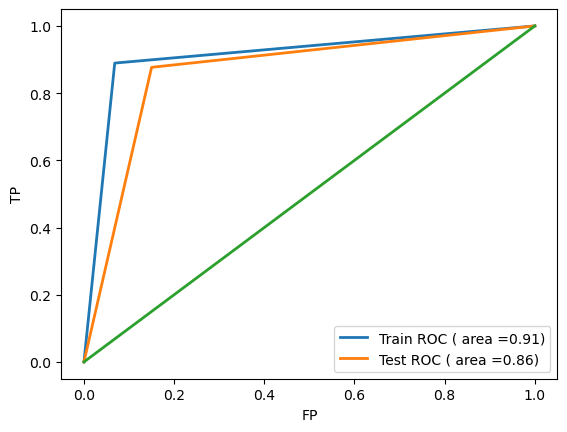

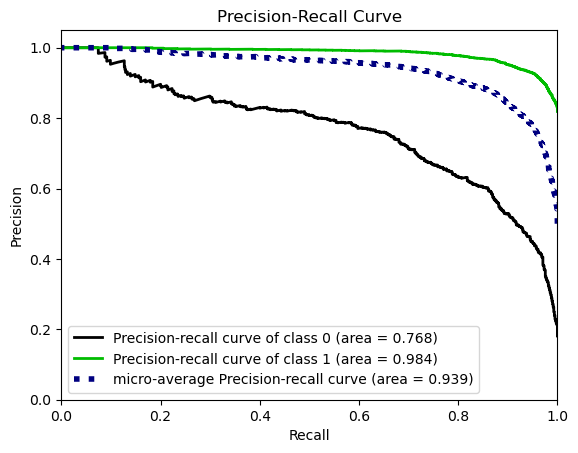

In [ ]:
Curve1(log_model_tf_idf,X_train_tf_idf,y_train,X_test_tf_idf,y_test)

In [ ]:
y_pred = log_model_tf_idf.predict(X_test_tf_idf)
y_pred_proba= log_model_tf_idf.predict_proba(X_test_tf_idf)[:,1]

log_tf_idf_ap = average_precision_score(y_test, y_pred_proba)
log_tf_idf_rec = recall_score(y_test, y_pred)
log_tf_idf_f1 = f1_score(y_test,y_pred)
log_tf_idf_acc = accuracy_score(y_test,y_pred)


## Naive Bayes

### Countvectorizer

In [ ]:
nb_model = BernoulliNB()
alpha = [0.001 ,0.01,0.1,1,3,5,8,10,12]
param_grid = {"alpha" : alpha}

nb_grid_model = GridSearchCV(estimator=nb_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = scoring, refit='f1',#multy scoring does not work we need to specify one metrics only
                          n_jobs = -1)

In [ ]:
%%time
nb_grid_model.fit(X_train_count,y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 3, 5, 8, 10, 12]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
nb_grid_model.best_params_ , nb_grid_model.best_score_

({'alpha': 0.1}, 0.6901967311441372)

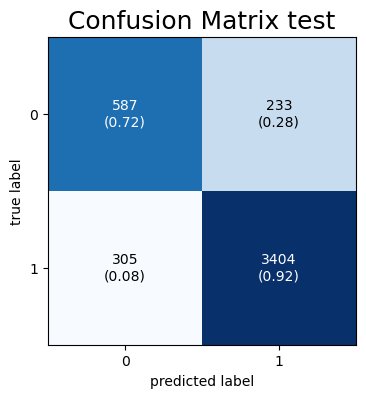

              precision    recall  f1-score   support

           0       0.66      0.72      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529


	Train_Set



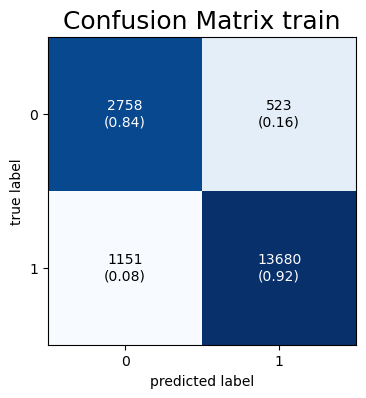

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.83      0.88      0.85     18112
weighted avg       0.92      0.91      0.91     18112



In [ ]:
Eval(nb_grid_model, X_train_count, y_train, X_test_count, y_test)

### Best parameters

In [ ]:
nb_model_count = BernoulliNB(alpha=0.1)

In [ ]:
nb_model_count.fit(X_train_count,y_train)

BernoulliNB(alpha=0.1)

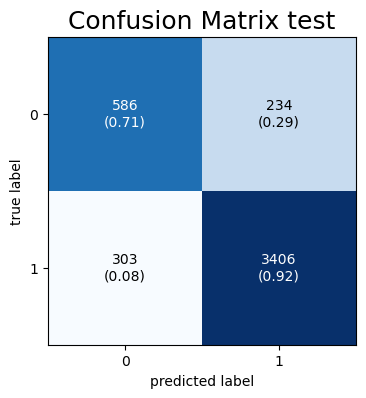

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529


	Train_Set



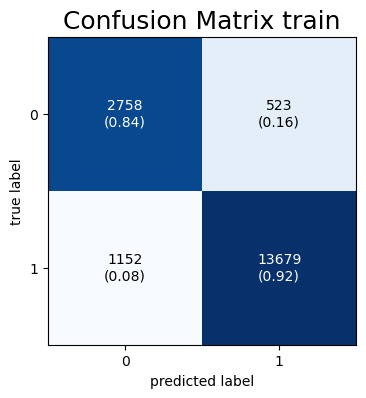

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.83      0.88      0.85     18112
weighted avg       0.92      0.91      0.91     18112



In [ ]:
Eval(nb_model_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
scores_nb_count = Eval_scores(nb_model_count, X_train_count, y_train)
scores_nb_count.mean()[2:]

test_accuracy      0.879030
train_accuracy     0.911785
test_precision          NaN
train_precision         NaN
test_recall        0.730569
train_recall       0.848369
test_f1            0.686347
train_f1           0.777002
dtype: float64

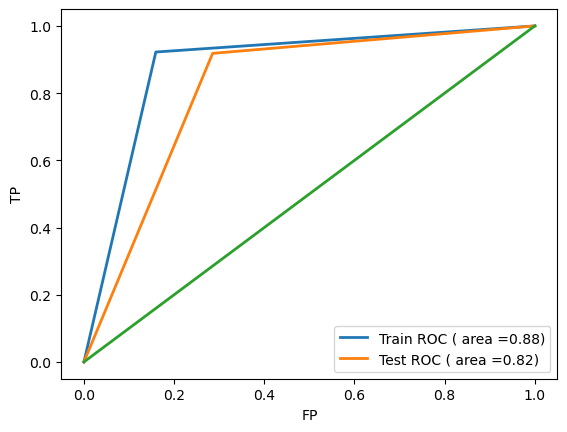

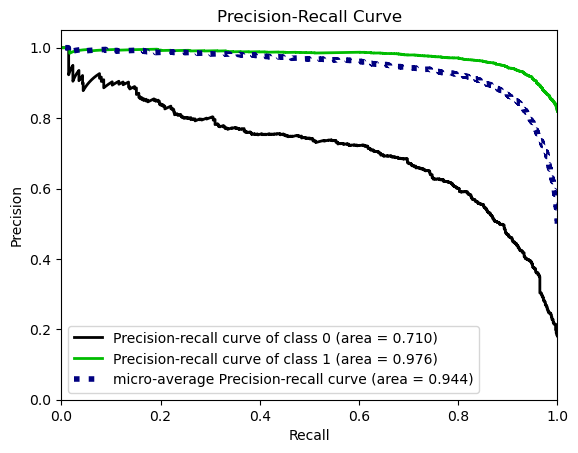

In [ ]:
Curve1(nb_model_count,X_train_count,y_train,X_test_count,y_test)

In [ ]:
y_pred = nb_model_count.predict(X_test_count)
y_pred_proba= nb_model_count.predict_proba(X_test_count)[:,1]

nb_ap_count = average_precision_score(y_test, y_pred_proba)
nb_count_rec = recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test,y_pred)
nb_count_acc = accuracy_score(y_test,y_pred)

### TF-IDF

In [ ]:
%%time
nb_grid_model.fit(X_train_tf_idf,y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(), n_jobs=-1,
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 3, 5, 8, 10, 12]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
nb_grid_model.best_params_ , nb_grid_model.best_score_

({'alpha': 0.1}, 0.6875875791278817)

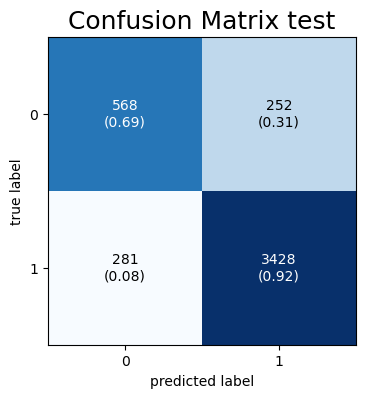

              precision    recall  f1-score   support

           0       0.67      0.69      0.68       820
           1       0.93      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.81      0.80      4529
weighted avg       0.88      0.88      0.88      4529


	Train_Set



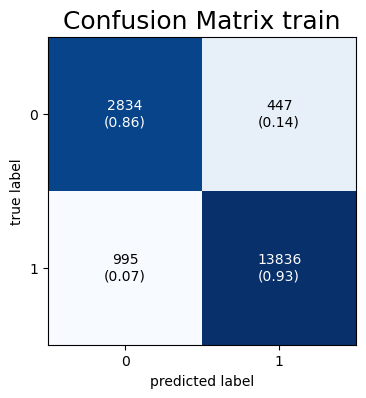

              precision    recall  f1-score   support

           0       0.74      0.86      0.80      3281
           1       0.97      0.93      0.95     14831

    accuracy                           0.92     18112
   macro avg       0.85      0.90      0.87     18112
weighted avg       0.93      0.92      0.92     18112



In [ ]:
Eval(nb_grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

### Best parameters

In [ ]:
nb_model_tf_idf = BernoulliNB(alpha=0.1)

In [ ]:
nb_model_tf_idf.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.1)

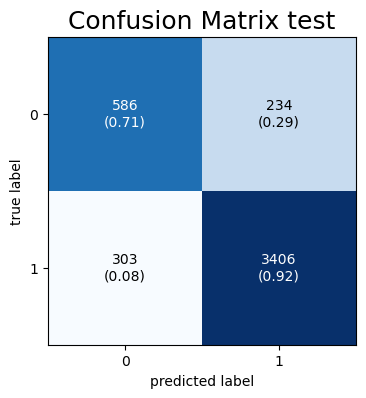

              precision    recall  f1-score   support

           0       0.66      0.71      0.69       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.82      0.81      4529
weighted avg       0.89      0.88      0.88      4529


	Train_Set



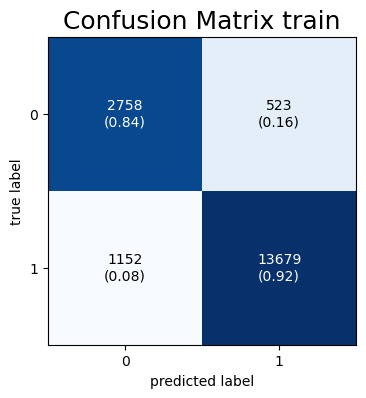

              precision    recall  f1-score   support

           0       0.71      0.84      0.77      3281
           1       0.96      0.92      0.94     14831

    accuracy                           0.91     18112
   macro avg       0.83      0.88      0.85     18112
weighted avg       0.92      0.91      0.91     18112



In [ ]:
Eval(nb_model_tf_idf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
scores_log_tf_idf = Eval_scores(nb_model_tf_idf, X_train_tf_idf, y_train)
scores_log_tf_idf.mean()[2:]

test_accuracy      0.879030
train_accuracy     0.911785
test_precision          NaN
train_precision         NaN
test_recall        0.730569
train_recall       0.848369
test_f1            0.686347
train_f1           0.777002
dtype: float64

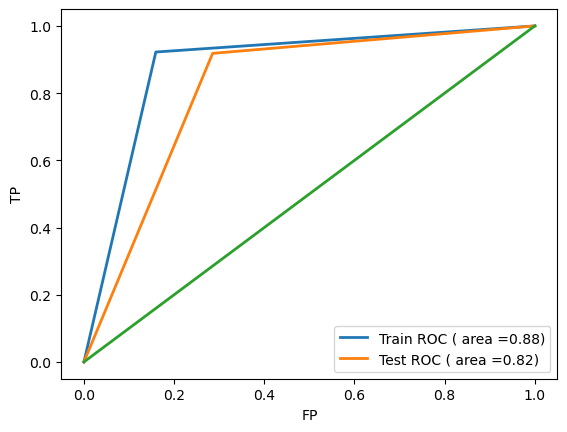

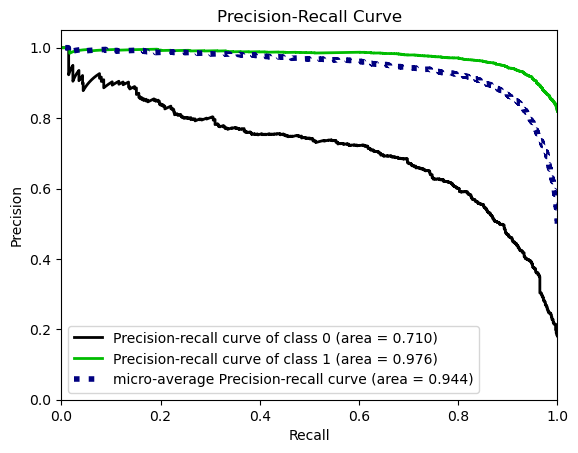

In [ ]:
Curve1(nb_model_tf_idf,X_train_tf_idf,y_train,X_test_tf_idf,y_test)

In [ ]:
y_pred = nb_model_tf_idf.predict(X_test_tf_idf)
y_pred_proba= nb_model_tf_idf.predict_proba(X_test_tf_idf)[:,1]

nb_tf_idf_ap = average_precision_score(y_test, y_pred_proba)
nb_tf_idf_rec = recall_score(y_test, y_pred)
nb_tf_idf_f1 = f1_score(y_test,y_pred)
nb_tf_idf_acc = accuracy_score(y_test,y_pred)



## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
svm_model = SVC()
gamma = ["scale", "auto", 0.01]
C = [0.5, 1 ,1.5]
class_weight= ["balanced", None]
param_grid = {"gamma" : gamma,
              "C" : C,
              "class_weight": class_weight }

svc_grid_model = GridSearchCV(estimator=svm_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = scoring, refit='f1',#multy scoring does not work we need to specify one metrics only
                          n_jobs = -1)

In [ ]:
%%time
svc_grid_model.fit(X_train_count,y_train)

CPU times: total: 1min 27s
Wall time: 1h 54min 55s


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto', 0.01]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
svc_grid_model.best_params_ , svc_grid_model.best_score_

({'C': 1, 'class_weight': 'balanced', 'gamma': 'scale'}, 0.6925682617828428)

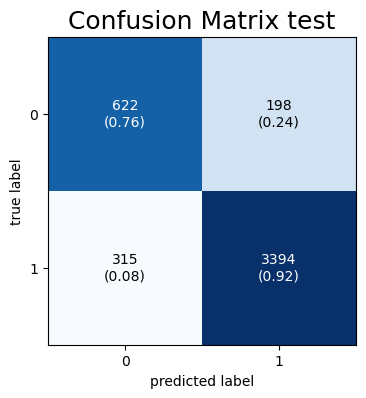

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.89      0.89      0.89      4529


	Train_Set



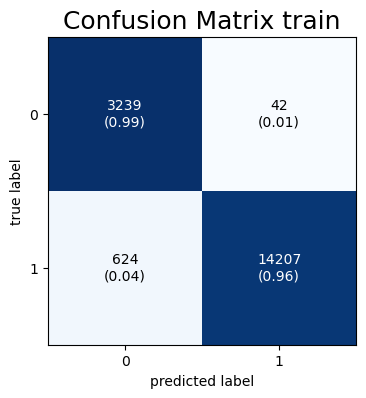

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3281
           1       1.00      0.96      0.98     14831

    accuracy                           0.96     18112
   macro avg       0.92      0.97      0.94     18112
weighted avg       0.97      0.96      0.96     18112



In [ ]:
Eval(svc_grid_model, X_train_count, y_train, X_test_count, y_test)

### Best parameters

In [ ]:
svm_model_count = SVC(C= 1, class_weight= 'balanced', gamma= 'scale',probability=True)

In [ ]:
svm_model_count.fit(X_train_count,y_train)

SVC(C=1, class_weight='balanced', probability=True)

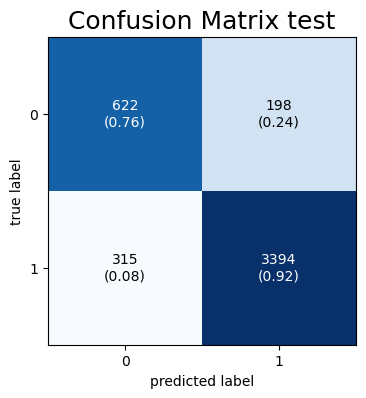

              precision    recall  f1-score   support

           0       0.66      0.76      0.71       820
           1       0.94      0.92      0.93      3709

    accuracy                           0.89      4529
   macro avg       0.80      0.84      0.82      4529
weighted avg       0.89      0.89      0.89      4529


	Train_Set



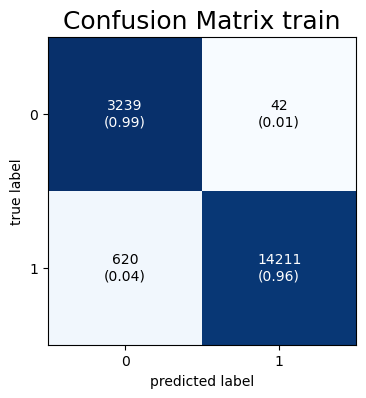

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      3281
           1       1.00      0.96      0.98     14831

    accuracy                           0.96     18112
   macro avg       0.92      0.97      0.94     18112
weighted avg       0.97      0.96      0.96     18112



In [ ]:
Eval(svm_model_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
scores_svm_count = Eval_scores(svm_model_count, X_train_count, y_train)
scores_svm_count.mean()[2:]


test_accuracy      0.881791
train_accuracy     0.964319
test_precision          NaN
train_precision         NaN
test_recall        0.719611
train_recall       0.988799
test_f1            0.687897
train_f1           0.909427
dtype: float64

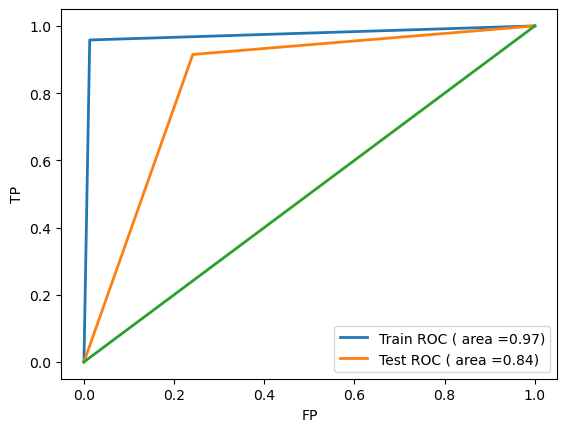

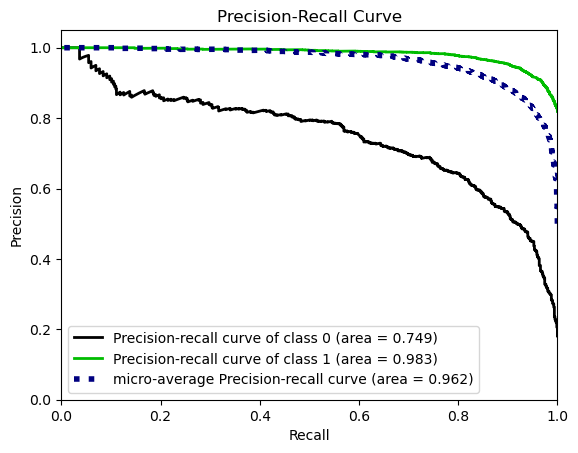

In [ ]:
Curve1(svm_model_count,X_train_count,y_train,X_test_count,y_test)

In [ ]:

y_pred = svm_model_count.predict(X_test_count)
y_pred_proba= svm_model_count.predict_proba(X_test_count)[:,1]

svm_ap_count = average_precision_score(y_test, y_pred_proba)
svm_count_rec = recall_score(y_test, y_pred)
svm_count_f1 = f1_score(y_test,y_pred)
svm_count_acc = accuracy_score(y_test,y_pred)

(0.9841011244525015, 0.9828372290654899)

### TD-IDF

In [ ]:
%%time
svc_grid_model.fit(X_train_tf_idf,y_train)

CPU times: total: 58.8 s
Wall time: 2h 13min 8s


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.5, 1, 1.5], 'class_weight': ['balanced', None],
                         'gamma': ['scale', 'auto', 0.01]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
svc_grid_model.best_params_ , svc_grid_model.best_score_

({'C': 0.5, 'class_weight': 'balanced', 'gamma': 'scale'}, 0.7047317468508241)

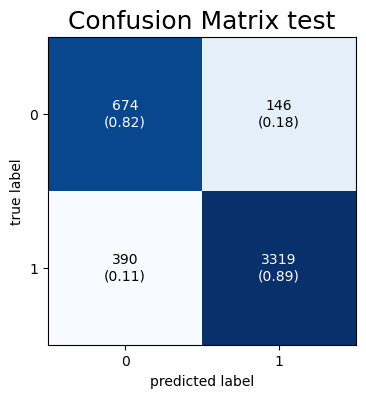

              precision    recall  f1-score   support

           0       0.63      0.82      0.72       820
           1       0.96      0.89      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.80      0.86      0.82      4529
weighted avg       0.90      0.88      0.89      4529


	Train_Set



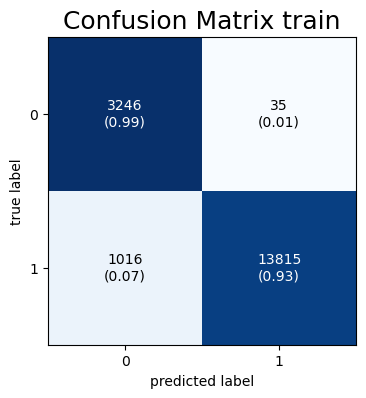

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3281
           1       1.00      0.93      0.96     14831

    accuracy                           0.94     18112
   macro avg       0.88      0.96      0.91     18112
weighted avg       0.95      0.94      0.94     18112



In [ ]:
Eval(svc_grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

### Best parameters

In [ ]:
svm_model_tf_idf = SVC(C= 0.5, class_weight= 'balanced', gamma= 'scale',probability=True)

In [ ]:
svm_model_tf_idf.fit(X_train_tf_idf,y_train)

SVC(C=0.5, class_weight='balanced', probability=True)

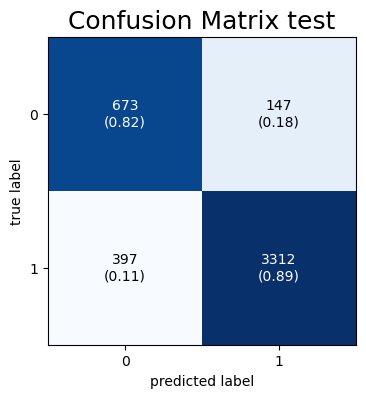

              precision    recall  f1-score   support

           0       0.63      0.82      0.71       820
           1       0.96      0.89      0.92      3709

    accuracy                           0.88      4529
   macro avg       0.79      0.86      0.82      4529
weighted avg       0.90      0.88      0.89      4529


	Train_Set



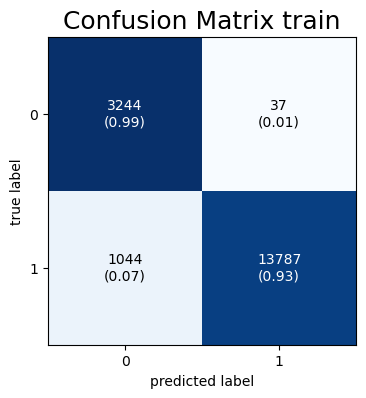

              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3281
           1       1.00      0.93      0.96     14831

    accuracy                           0.94     18112
   macro avg       0.88      0.96      0.91     18112
weighted avg       0.95      0.94      0.94     18112



In [ ]:
Eval(svm_model_tf_idf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
scores_svm_tf_idf = Eval_scores(svm_model_tf_idf, X_train_tf_idf, y_train)
scores_svm_tf_idf.mean()[2:]

test_accuracy      0.876712
train_accuracy     0.943449
test_precision          NaN
train_precision         NaN
test_recall        0.797941
train_recall       0.989866
test_f1            0.700928
train_f1           0.863797
dtype: float64

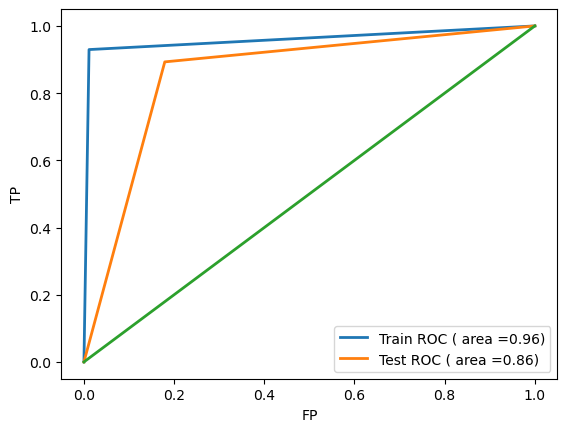

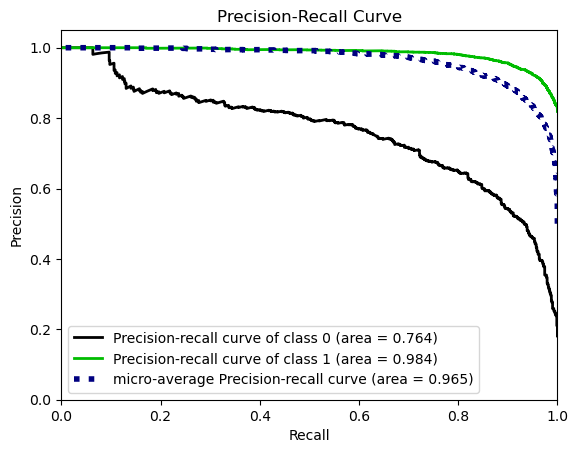

In [ ]:
Curve1(svm_model_tf_idf,X_train_tf_idf,y_train,X_test_tf_idf,y_test)

In [ ]:
y_pred = svm_model_tf_idf.predict(X_test_tf_idf)
y_pred_proba= svm_model_tf_idf.predict_proba(X_test_tf_idf)[:,1]

svm_tf_idf_ap = average_precision_score(y_test, y_pred_proba)
svm_tf_idf_rec = recall_score(y_test, y_pred)
svm_tf_idf_f1 = f1_score(y_test,y_pred)
svm_tf_idf_acc = accuracy_score(y_test,y_pred)


## Random Forest

### Countvectorizer

In [ ]:
rf_model = RandomForestClassifier( random_state=101 , n_jobs = -1)
n_estimators = [50,100,200]
max_features=[2,'sqrt']
max_depth = [3,7,None]
class_weight= ["balanced", None]

param_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'class_weight':class_weight}

rf_grid_model = GridSearchCV(estimator=rf_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = scoring, refit='f1',#multy scoring does not work we need to specify one metrics only
                          n_jobs = -1)

In [ ]:
%%time
rf_grid_model.fit(X_train_count,y_train)

CPU times: user 10.4 s, sys: 1.32 s, total: 11.7 s
Wall time: 24min 54s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 7, None], 'max_features': [2, 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
rf_grid_model.best_params_ , rf_grid_model.best_score_

({'class_weight': 'balanced',
  'max_depth': 7,
  'max_features': 'sqrt',
  'n_estimators': 200},
 0.6395969198551524)

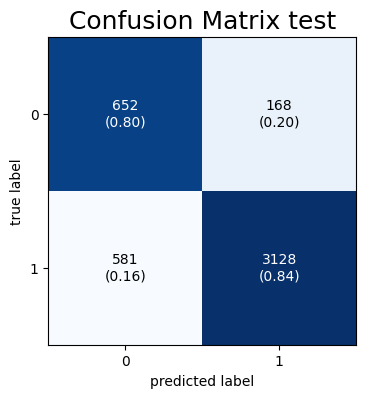

              precision    recall  f1-score   support

           0       0.53      0.80      0.64       820
           1       0.95      0.84      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.74      0.82      0.76      4529
weighted avg       0.87      0.83      0.85      4529


	Train_Set



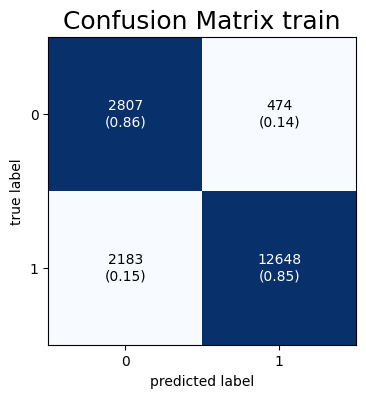

              precision    recall  f1-score   support

           0       0.56      0.86      0.68      3281
           1       0.96      0.85      0.90     14831

    accuracy                           0.85     18112
   macro avg       0.76      0.85      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [ ]:
Eval(rf_grid_model, X_train_count, y_train, X_test_count, y_test)

### Best parameters

In [ ]:
rf_model_count = RandomForestClassifier( random_state=101 , n_jobs = -1 ,class_weight='balanced', max_depth= 7,
                                        max_features= 'sqrt', n_estimators=200)

In [ ]:
rf_model_count.fit(X_train_count,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=200,
                       n_jobs=-1, random_state=101)

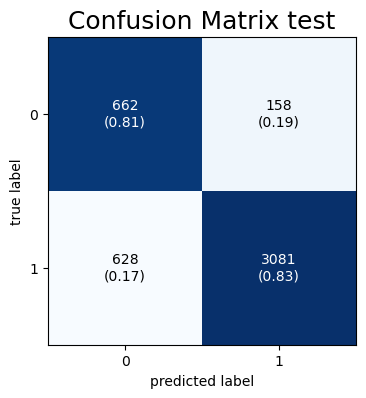

              precision    recall  f1-score   support

           0       0.51      0.81      0.63       820
           1       0.95      0.83      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529


	Train_Set



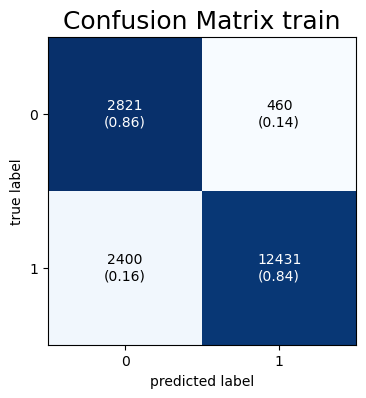

              precision    recall  f1-score   support

           0       0.54      0.86      0.66      3281
           1       0.96      0.84      0.90     14831

    accuracy                           0.84     18112
   macro avg       0.75      0.85      0.78     18112
weighted avg       0.89      0.84      0.85     18112



In [ ]:
Eval(rf_model_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
scores_rf_count = Eval_scores(rf_model_count, X_train_count, y_train)
scores_rf_count.mean()[2:]

test_accuracy      0.826027
train_accuracy     0.848898
test_precision          NaN
train_precision         NaN
test_recall        0.818051
train_recall       0.870238
test_f1            0.630194
train_f1           0.676088
dtype: float64

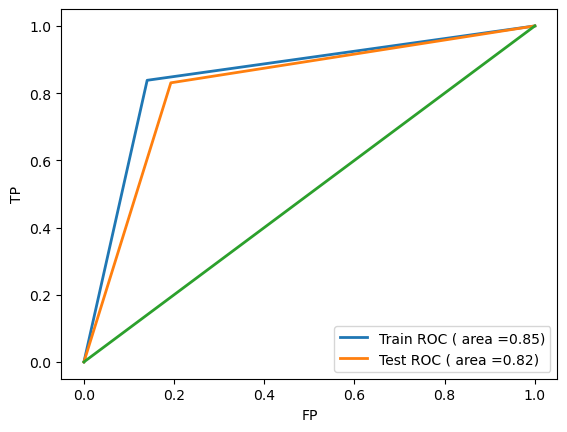

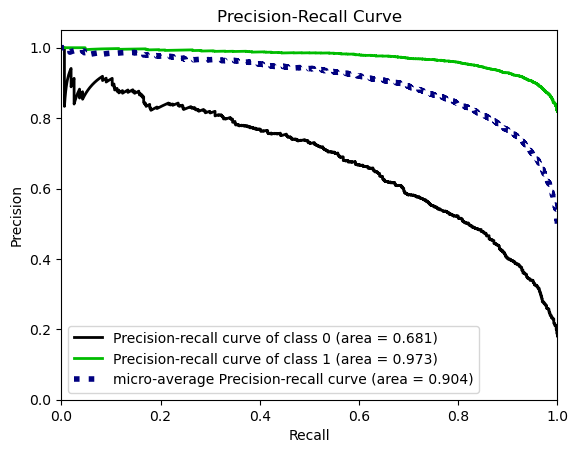

In [ ]:
Curve1(rf_model_count,X_train_count,y_train,X_test_count,y_test)

In [ ]:

y_pred = rf_model_count.predict(X_test_count)
y_pred_proba= rf_model_count.predict_proba(X_test_count)[:,1]

rf_ap_count = average_precision_score(y_test, y_pred_proba)
rf_count_rec = recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test,y_pred)
rf_count_acc = accuracy_score(y_test,y_pred)

### TF-IDF

In [ ]:
%%time
rf_grid_model.fit(X_train_tf_idf,y_train)

CPU times: user 15 s, sys: 2.14 s, total: 17.2 s
Wall time: 38min 56s


GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=101),
             n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [3, 7, None], 'max_features': [2, 'sqrt'],
                         'n_estimators': [50, 100, 200]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
rf_grid_model.best_params_ , rf_grid_model.best_score_

({'class_weight': 'balanced',
  'max_depth': 7,
  'max_features': 'sqrt',
  'n_estimators': 200},
 0.6338504591440488)

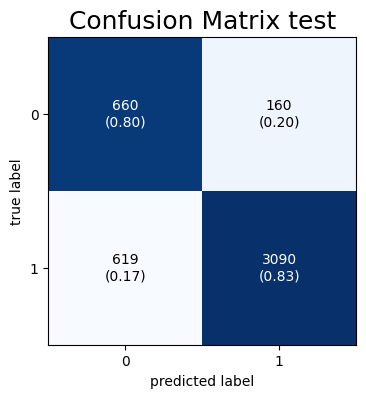

              precision    recall  f1-score   support

           0       0.52      0.80      0.63       820
           1       0.95      0.83      0.89      3709

    accuracy                           0.83      4529
   macro avg       0.73      0.82      0.76      4529
weighted avg       0.87      0.83      0.84      4529


	Train_Set



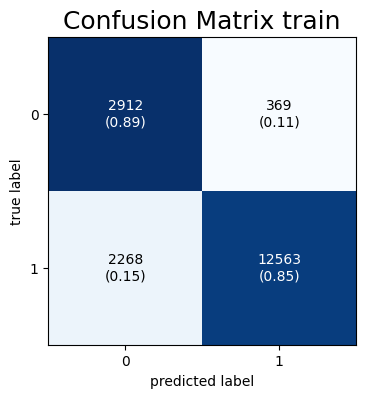

              precision    recall  f1-score   support

           0       0.56      0.89      0.69      3281
           1       0.97      0.85      0.91     14831

    accuracy                           0.85     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.85      0.87     18112



In [ ]:
Eval(rf_grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

### Best parameters

In [ ]:
rf_model_tf_idf = RandomForestClassifier( random_state=101 , n_jobs = -1 ,class_weight='balanced', max_depth= 7,
                                        max_features= 'sqrt', n_estimators=200)

In [ ]:
rf_model_tf_idf.fit(X_train_tf_idf,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=7, n_estimators=200,
                       n_jobs=-1, random_state=101)

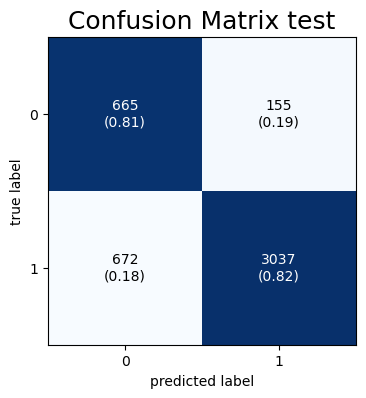

              precision    recall  f1-score   support

           0       0.50      0.81      0.62       820
           1       0.95      0.82      0.88      3709

    accuracy                           0.82      4529
   macro avg       0.72      0.81      0.75      4529
weighted avg       0.87      0.82      0.83      4529


	Train_Set



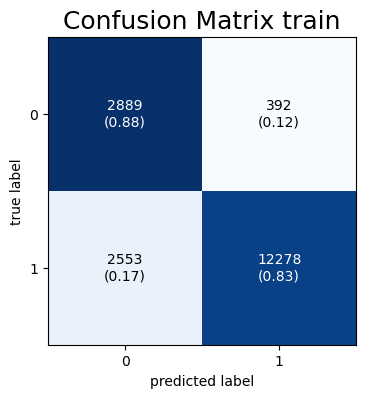

              precision    recall  f1-score   support

           0       0.53      0.88      0.66      3281
           1       0.97      0.83      0.89     14831

    accuracy                           0.84     18112
   macro avg       0.75      0.85      0.78     18112
weighted avg       0.89      0.84      0.85     18112



In [ ]:
Eval(rf_model_tf_idf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
scores_rf_tf_idf = Eval_scores(rf_model_tf_idf, X_train_tf_idf, y_train)
scores_rf_tf_idf.mean()[2:]


test_accuracy      0.819733
train_accuracy     0.844978
test_precision          NaN
train_precision         NaN
test_recall        0.821404
train_recall       0.888220
test_f1            0.622813
train_f1           0.674899
dtype: float64

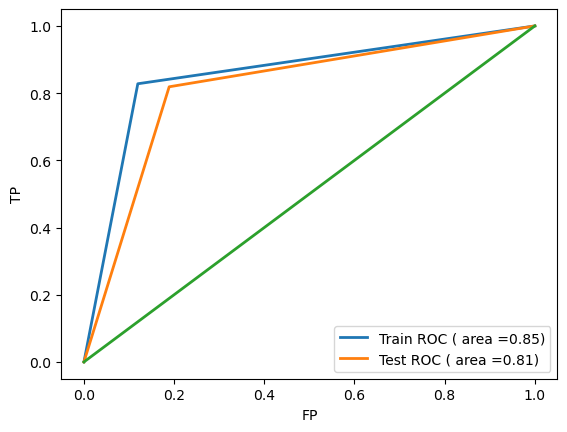

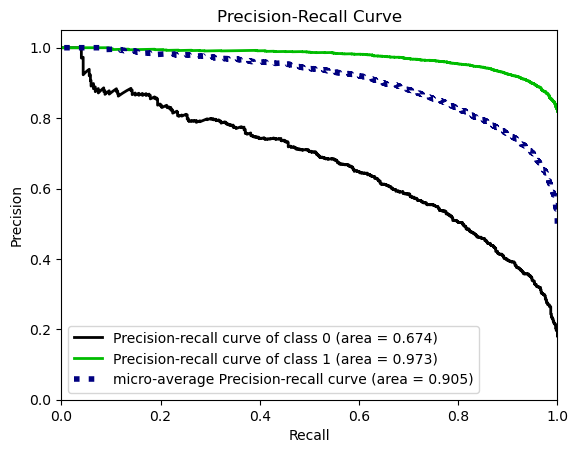

In [ ]:
Curve1(rf_model_tf_idf,X_train_tf_idf,y_train,X_test_tf_idf,y_test)

In [ ]:
y_pred = rf_model_tf_idf.predict(X_test_tf_idf)
y_pred_proba= rf_model_tf_idf.predict_proba(X_test_tf_idf)[:,1]

rf_tf_idf_ap = average_precision_score(y_test, y_pred_proba)
rf_tf_idf_rec = recall_score(y_test, y_pred)
rf_tf_idf_f1 = f1_score(y_test,y_pred)
rf_tf_idf_acc = accuracy_score(y_test,y_pred)


## Ada Boosting

### Countvectorizer

In [ ]:
ada_model = AdaBoostClassifier( random_state=101 )
n_estimators = [50,100,200]
learning_rate=[0.01,0.1,1]

param_grid = {'n_estimators':n_estimators,
              'learning_rate':learning_rate
              }

ada_grid_model = GridSearchCV(estimator=ada_model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = scoring, refit='f1',#multy scoring does not work we need to specify one metrics only
                          n_jobs = -1)

In [ ]:
%%time
ada_grid_model.fit(X_train_count,y_train)

CPU times: user 15 s, sys: 1.23 s, total: 16.3 s
Wall time: 9min 29s


GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
ada_grid_model.best_params_ , ada_grid_model.best_score_

({'learning_rate': 1, 'n_estimators': 200}, 0.6167656072204186)

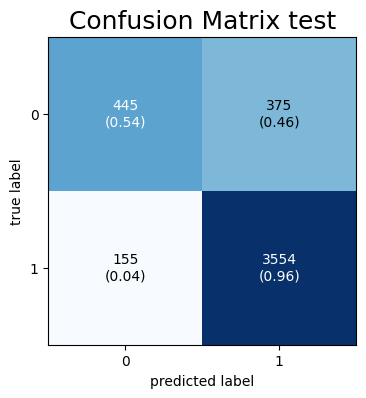

              precision    recall  f1-score   support

           0       0.74      0.54      0.63       820
           1       0.90      0.96      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.75      0.78      4529
weighted avg       0.88      0.88      0.88      4529


	Train_Set



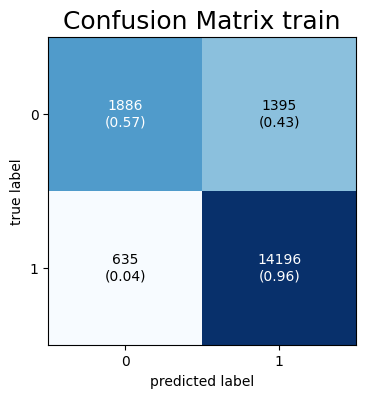

              precision    recall  f1-score   support

           0       0.75      0.57      0.65      3281
           1       0.91      0.96      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.83      0.77      0.79     18112
weighted avg       0.88      0.89      0.88     18112



In [ ]:
Eval(ada_grid_model, X_train_count, y_train, X_test_count, y_test)

### Best parameters

In [ ]:
ada_model_count = AdaBoostClassifier( random_state=101  ,learning_rate=1, n_estimators= 200)

In [ ]:
ada_model_count.fit(X_train_count,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=101)

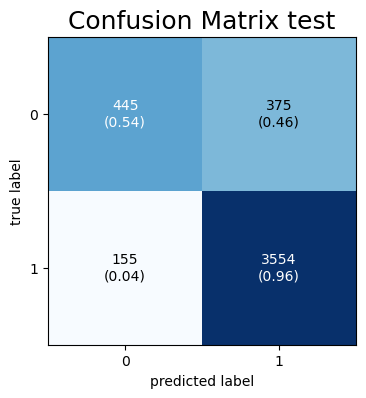

              precision    recall  f1-score   support

           0       0.74      0.54      0.63       820
           1       0.90      0.96      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.75      0.78      4529
weighted avg       0.88      0.88      0.88      4529


	Train_Set



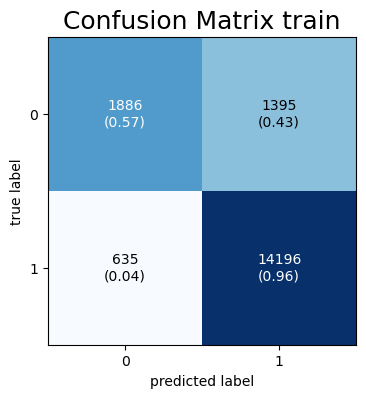

              precision    recall  f1-score   support

           0       0.75      0.57      0.65      3281
           1       0.91      0.96      0.93     14831

    accuracy                           0.89     18112
   macro avg       0.83      0.77      0.79     18112
weighted avg       0.88      0.89      0.88     18112



In [ ]:
Eval(ada_model_count, X_train_count, y_train, X_test_count, y_test)

In [ ]:
scores_ada_count = Eval_scores(ada_model_count, X_train_count, y_train)
scores_ada_count.mean()[2:]

test_accuracy      0.873289
train_accuracy     0.889300
test_precision          NaN
train_precision         NaN
test_recall        0.533684
train_recall       0.581683
test_f1            0.604066
train_f1           0.655612
dtype: float64

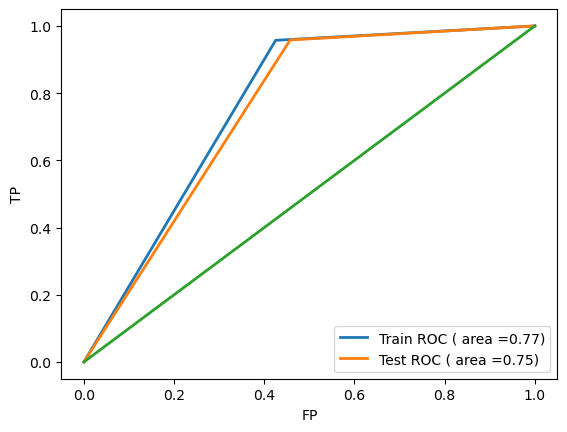

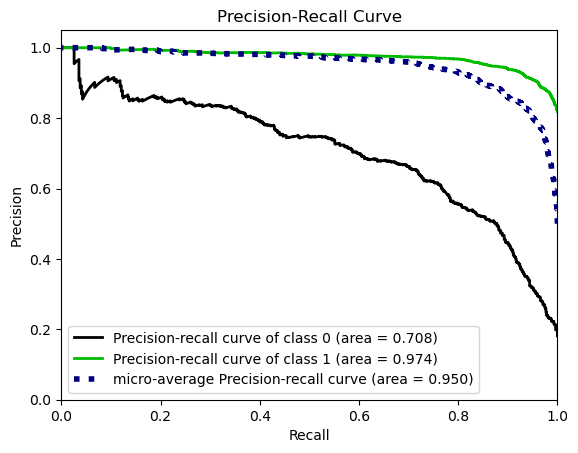

In [ ]:
Curve1(ada_model_count,X_train_count,y_train,X_test_count,y_test)

In [ ]:
y_pred = ada_model_count.predict(X_test_count)
y_pred_proba= ada_model_count.predict_proba(X_test_count)[:,1]

ada_ap_count = average_precision_score(y_test, y_pred_proba)
ada_count_rec = recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test,y_pred)
ada_count_acc = accuracy_score(y_test,y_pred)


### TF-IDF

In [ ]:
%%time
ada_grid_model.fit(X_train_tf_idf,y_train)

CPU times: user 47.1 s, sys: 5.53 s, total: 52.7 s
Wall time: 46min 22s


GridSearchCV(cv=10, estimator=AdaBoostClassifier(random_state=101), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'n_estimators': [50, 100, 200]},
             refit='f1',
             scoring={'accuracy': make_scorer(accuracy_score),
                      'f1': make_scorer(f1_score, average=None, labels=[0]),
                      'precision': make_scorer(precision_score, average=None, labels=[0]),
                      'recall': make_scorer(recall_score, average=None, labels=[0])})

In [ ]:
ada_grid_model.best_params_ , ada_grid_model.best_score_

({'learning_rate': 1, 'n_estimators': 200}, 0.6054580075280579)

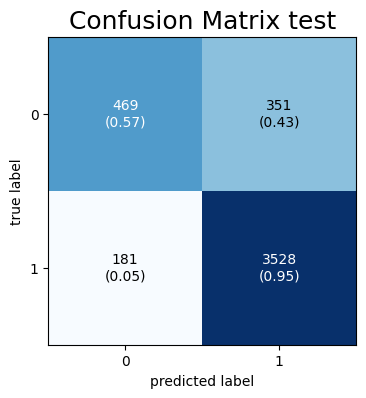

              precision    recall  f1-score   support

           0       0.72      0.57      0.64       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.82      0.76      0.78      4529
weighted avg       0.88      0.88      0.88      4529


	Train_Set



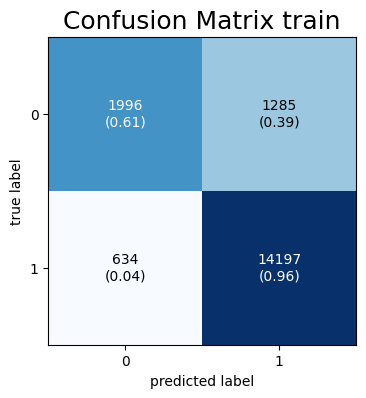

              precision    recall  f1-score   support

           0       0.76      0.61      0.68      3281
           1       0.92      0.96      0.94     14831

    accuracy                           0.89     18112
   macro avg       0.84      0.78      0.81     18112
weighted avg       0.89      0.89      0.89     18112



In [ ]:
Eval(ada_grid_model, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

### Best parameters

In [ ]:
ada_model_tf_idf = AdaBoostClassifier( random_state=101  ,learning_rate=1, n_estimators= 200)

In [ ]:
ada_model_tf_idf.fit(X_train_tf_idf,y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=200, random_state=101)

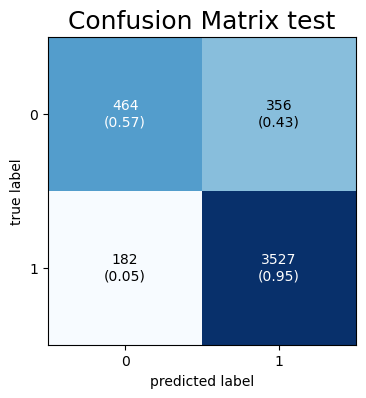

              precision    recall  f1-score   support

           0       0.72      0.57      0.63       820
           1       0.91      0.95      0.93      3709

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.87      0.88      0.88      4529


	Train_Set



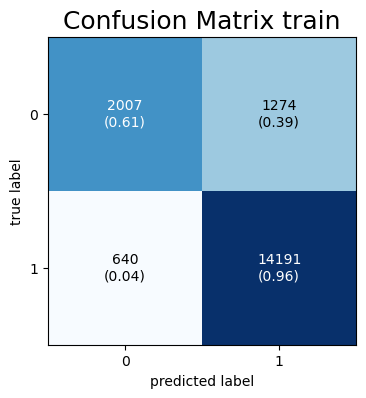

              precision    recall  f1-score   support

           0       0.76      0.61      0.68      3281
           1       0.92      0.96      0.94     14831

    accuracy                           0.89     18112
   macro avg       0.84      0.78      0.81     18112
weighted avg       0.89      0.89      0.89     18112



In [ ]:
Eval(ada_model_tf_idf, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [ ]:
scores_ada_tf_idf= Eval_scores(ada_model_tf_idf, X_train_tf_idf, y_train)
scores_ada_tf_idf.mean()[2:]

test_accuracy      0.873565
train_accuracy     0.895829
test_precision          NaN
train_precision         NaN
test_recall        0.544663
train_recall       0.617876
test_f1            0.609322
train_f1           0.682403
dtype: float64

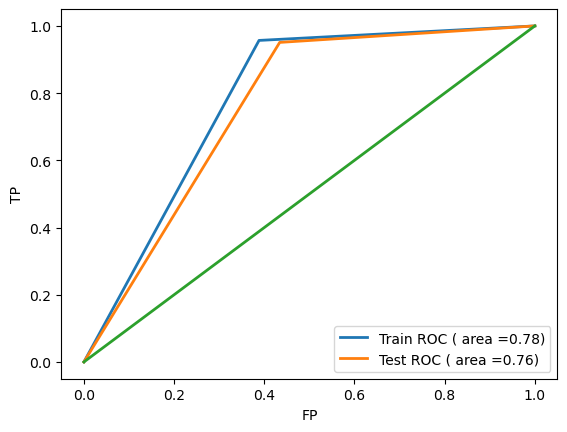

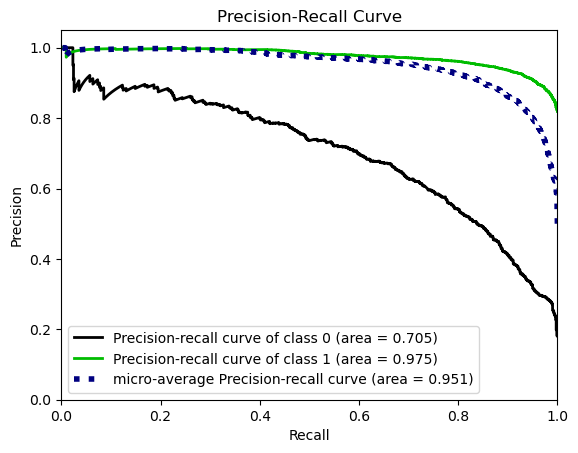

In [ ]:
Curve1(ada_model_tf_idf,X_train_tf_idf,y_train,X_test_tf_idf,y_test)

## DL modeling

### Tokenization

In [ ]:
num_words = 5001
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [ ]:
len(tokenizer.word_index)

14847

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)


### Maximum number of tokens for all documents¶

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
num_tokens

array([ 7, 62, 96, ..., 42, 84, 18])

In [ ]:
num_tokens.mean()

59.907292080738486

In [ ]:
max_tokens=num_tokens.max()
max_tokens

116

In [ ]:
num_tokens.min()

2

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

1.0

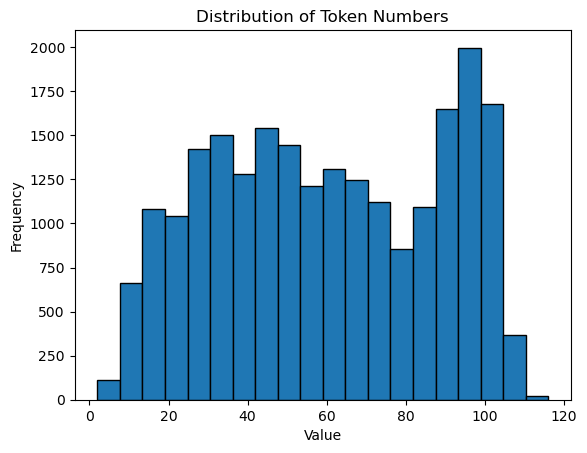

In [ ]:
plt.hist(num_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [ ]:
max_tokens = 110

In [ ]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9991608144516585

In [ ]:
sum(num_tokens <= max_tokens)

22622

In [ ]:
len(num_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)

In [ ]:
X_pad.shape

(22641, 110)

In [ ]:
len(X_num_tokens[105])

63

In [ ]:
X_pad[105]


array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    1,   80,    6,  478,   30,    5,    6,  389,
          2,   24,    1, 1905,  482,   47,    3,   21,    5,    2,  243,
       2182,  210,  189,  563,   14,   92,    3,  871,  313,    4,  283,
        109,    5,   78,  130,    8,   22,   30,    2,  239,   32,    4,
         46,    9,   75,  103,  143,    5,    6,    1, 2868,   77,  148,
          9,    1,  200,    2,   41,  324,    7,   25,    4,  265,  265])

In [ ]:
np.argmax(num_tokens)

16263

In [ ]:
np.array(X_num_tokens[11957])


array([   2,  346,    7,   80,   16,   84,    2,   52,    4,  623,   56,
        136,    9,    1,  318,   22,   10,  244,   47,  302,    1,  623,
         56,    6,   84,  317,   71,    1,  171,    3,   76,  534,   28,
          4,  388,   37,   50,   28,    4,  554,  303,   25,   19,    4,
        111,   48,   16,    1,  623,   56,    6,  176,   63,  471,    1,
         80,   41,  115,  265,  863, 1098,   59,  128,   61,    3,  242,
          3,   76,   34,   14,   75, 4594,   13,  765,   92, 1293,  268,
        228,    5,  364,    9,   50,   93,    2,  423,   32,    4,  249,
         37,  394,    9,  103,  218,    3,  396,    1,  394,    9, 1055])

In [ ]:
X_pad[11957]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          2,  346,    7,   80,   16,   84,    2,   52,    4,  623,   56,
        136,    9,    1,  318,   22,   10,  244,   47,  302,    1,  623,
         56,    6,   84,  317,   71,    1,  171,    3,   76,  534,   28,
          4,  388,   37,   50,   28,    4,  554,  303,   25,   19,    4,
        111,   48,   16,    1,  623,   56,    6,  176,   63,  471,    1,
         80,   41,  115,  265,  863, 1098,   59,  128,   61,    3,  242,
          3,   76,   34,   14,   75, 4594,   13,  765,   92, 1293,  268,
        228,    5,  364,    9,   50,   93,    2,  423,   32,    4,  249,
         37,  394,    9,  103,  218,    3,  396,    1,  394,    9, 1055])

In [ ]:
X_pad.shape

(22641, 110)

### Train Set Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad,
                                                    y,
                                                    test_size=0.1,
                                                    stratify=y,
                                                    random_state=101)
X_train.shape


(20376, 110)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                    y_train,
                                                    test_size=0.1,
                                                    stratify=y_train,
                                                    random_state=101)

### Modeling

### GRU

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))
model.add(Dropout(0.2))

model.add(GRU(units=100, return_sequences=True))
model.add(Dropout(0.4))

model.add(GRU(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=25))
model.add(Dropout(0.3))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 110, 100)          500100    
                                                                 
 dropout (Dropout)           (None, 110, 100)          0         
                                                                 
 gru (GRU)                   (None, 110, 100)          60600     
                                                                 
 dropout_1 (Dropout)         (None, 110, 100)          0         
                                                                 
 gru_1 (GRU)                 (None, 110, 50)           22800     
                                                                 
 dropout_2 (Dropout)         (None, 110, 50)           0         
                                                                 
 gru_2 (GRU)                 (None, 25)                5

In [ ]:
optimizer = Adam(learning_rate=0.01)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=["Recall"])

In [ ]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="min",
                           verbose=1,
                           patience = 4,
                           restore_best_weights=True)

In [ ]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced',
                                                     y=y_train)
pd.Series(classes_weights).unique()

array([0.61061534, 2.76008429])

In [ ]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
144/144 [==============================] - 131s 843ms/step - loss: 0.4943 - recall: 0.7565 - val_loss: 0.2822 - val_recall: 0.9077
Epoch 2/10
144/144 [==============================] - 122s 846ms/step - loss: 0.3000 - recall: 0.8627 - val_loss: 0.3060 - val_recall: 0.8724
Epoch 3/10
144/144 [==============================] - 123s 852ms/step - loss: 0.2366 - recall: 0.8899 - val_loss: 0.5125 - val_recall: 0.7436
Epoch 4/10
144/144 [==============================] - 129s 894ms/step - loss: 0.2013 - recall: 0.9116 - val_loss: 0.4488 - val_recall: 0.8041
Epoch 5/10
144/144 [==============================] - 120s 836ms/step - loss: 0.1867 - recall: 0.9163 - val_loss: 0.3662 - val_recall: 0.8664
Epoch 5: early stopping
CPU times: total: 9min 30s
Wall time: 10min 25s


### Model Evaluation

In [ ]:
model_his = pd.DataFrame(model.history.history)
model_his.head()

loss    recall  val_loss  val_recall
0  0.494303  0.756526  0.282157    0.907729
1  0.299998  0.862746  0.306016    0.872379
2  0.236641  0.889917  0.512458    0.743559
3  0.201340  0.911561  0.448797    0.804074
4  0.186658  0.916289  0.366180    0.866387

<Axes: >

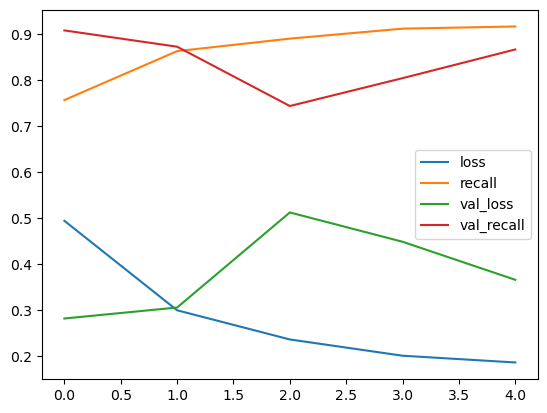

In [ ]:
model_his.plot()

71/71 [==============================] - 6s 81ms/step


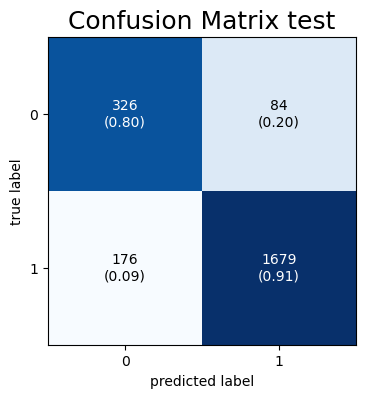

              precision    recall  f1-score   support

           0       0.65      0.80      0.71       410
           1       0.95      0.91      0.93      1855

    accuracy                           0.89      2265
   macro avg       0.80      0.85      0.82      2265
weighted avg       0.90      0.89      0.89      2265


	Train_Set



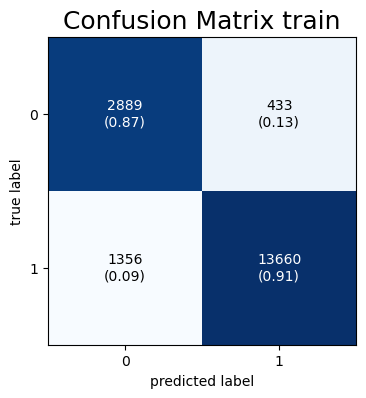

              precision    recall  f1-score   support

           0       0.68      0.87      0.76      3322
           1       0.97      0.91      0.94     15016

    accuracy                           0.90     18338
   macro avg       0.82      0.89      0.85     18338
weighted avg       0.92      0.90      0.91     18338



In [ ]:

    y_train_pred = model.predict(X_train)>= 0.5
    y_pred = model.predict(X_test)>= 0.5

    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix test', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()

    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix train', fontsize=18)
    plt.show()
    print(classification_report(y_train, y_train_pred))

In [ ]:
y_pred = model.predict(X_test) >= 0.5

DL_gru_acc = accuracy_score(y_test, y_pred)
DL_gru_f1 = f1_score(y_test, y_pred)
DL_gru_pre = average_precision_score(y_test, y_pred)
DL_gru_rec = recall_score(y_test, y_pred)

71/71 [==============================] - 4s 61ms/step


71/71 [==============================] - 4s 56ms/step


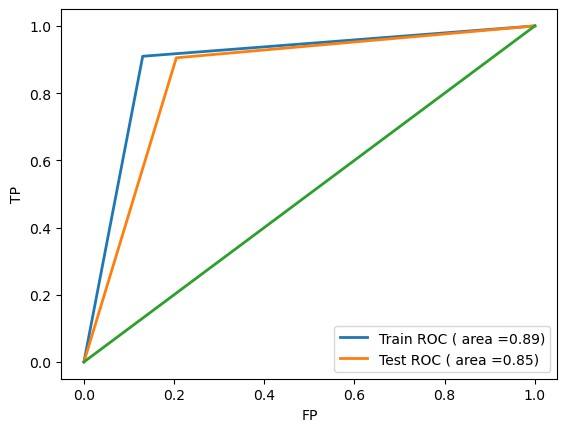

71/71 [==============================] - 4s 59ms/step


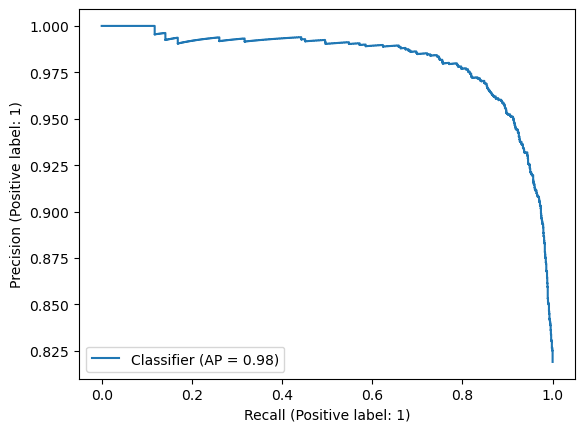

In [ ]:
    y_trian = model.predict(X_train)>= 0.5
    y_pred = model.predict(X_test)>= 0.5

    fprt , tprt, _  = roc_curve(y_train ,y_trian)
    vanillaT = auc(fprt,tprt)
    fprx , tprx, _  = roc_curve(y_test ,y_pred)
    vanillaX = auc(fprx,tprx)

    plt.plot(fprt,tprt,lw=2, label = f'Train ROC ( area ={vanillaT:.2f})')
    plt.plot(fprx,tprx,lw=2, label = f'Test ROC ( area ={vanillaX:.2f})')
    plt.plot([0,1],[0,1],lw=2)
    plt.xlabel("FP")
    plt.ylabel("TP")
    plt.legend(loc = "lower right")
    plt.show();


    y_pred_proba = model.predict(X_test)
    PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


###  LSTM

In [ ]:
model2 = Sequential()

In [ ]:
embedding_size2 = 100

In [ ]:
model2.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size2,
                    input_length=max_tokens))
model2.add(Dropout(0.2))

model2.add(LSTM(units=100, return_sequences=True))
model2.add(Dropout(0.4))

model2.add(LSTM(units=50, return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(units=25))
model2.add(Dropout(0.3))

model2.add(Dense(1, activation='sigmoid'))

In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 110, 100)          500100    
                                                                 
 dropout_4 (Dropout)         (None, 110, 100)          0         
                                                                 
 lstm (LSTM)                 (None, 110, 100)          80400     
                                                                 
 dropout_5 (Dropout)         (None, 110, 100)          0         
                                                                 
 lstm_1 (LSTM)               (None, 110, 50)           30200     
                                                                 
 dropout_6 (Dropout)         (None, 110, 50)           0         
                                                                 
 lstm_2 (LSTM)               (None, 25)               

In [ ]:
optimizer2 = Adam(learning_rate=0.001)

In [ ]:
model2.compile(loss='binary_crossentropy',
              optimizer=optimizer2,
              metrics=["Recall"])

In [ ]:
%%time
model2.fit(X_train, y_train, epochs=10, batch_size=128, sample_weight=classes_weights,
         validation_data=(X_val, y_val), callbacks=[early_stop])

Epoch 1/10
144/144 [==============================] - 111s 731ms/step - loss: 0.4832 - recall: 0.7287 - val_loss: 0.4751 - val_recall: 0.7484
Epoch 2/10
144/144 [==============================] - 107s 744ms/step - loss: 0.3100 - recall: 0.8471 - val_loss: 0.2849 - val_recall: 0.8975
Epoch 3/10
144/144 [==============================] - 105s 731ms/step - loss: 0.2564 - recall: 0.8791 - val_loss: 0.3280 - val_recall: 0.8520
Epoch 4/10
144/144 [==============================] - 117s 813ms/step - loss: 0.2155 - recall: 0.8976 - val_loss: 0.3487 - val_recall: 0.8394
Epoch 5/10
144/144 [==============================] - 114s 791ms/step - loss: 0.1806 - recall: 0.9142 - val_loss: 0.3650 - val_recall: 0.8688
Epoch 6/10
144/144 [==============================] - 114s 794ms/step - loss: 0.1574 - recall: 0.9298 - val_loss: 0.3772 - val_recall: 0.9071
Epoch 6: early stopping
CPU times: total: 9min 58s
Wall time: 11min 28s


In [ ]:
model_his2 = pd.DataFrame(model2.history.history)
model_his2.head()

loss    recall  val_loss  val_recall
0  0.483204  0.728689  0.475104    0.748352
1  0.310033  0.847096  0.284897    0.897543
2  0.256435  0.879129  0.328034    0.852007
3  0.215528  0.897642  0.348651    0.839425
4  0.180599  0.914225  0.365015    0.868784

<Axes: >

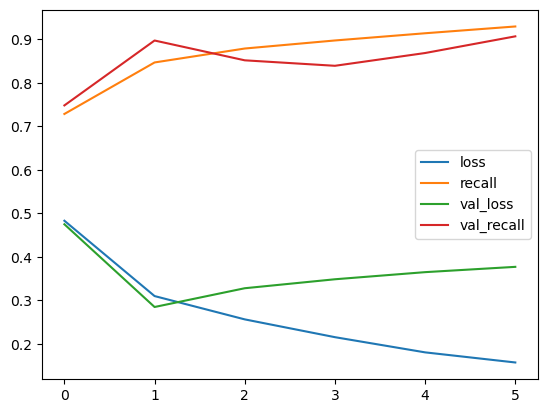

In [ ]:
model_his2.plot()

71/71 [==============================] - 6s 78ms/step


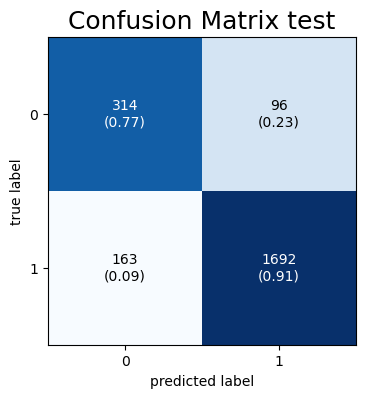

              precision    recall  f1-score   support

           0       0.66      0.77      0.71       410
           1       0.95      0.91      0.93      1855

    accuracy                           0.89      2265
   macro avg       0.80      0.84      0.82      2265
weighted avg       0.89      0.89      0.89      2265


	Train_Set



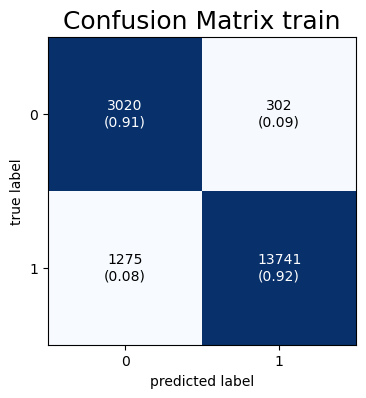

              precision    recall  f1-score   support

           0       0.70      0.91      0.79      3322
           1       0.98      0.92      0.95     15016

    accuracy                           0.91     18338
   macro avg       0.84      0.91      0.87     18338
weighted avg       0.93      0.91      0.92     18338



In [ ]:
    y_train_pred = model2.predict(X_train)>= 0.5
    y_pred = model2.predict(X_test)>= 0.5

    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test, y_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix test', fontsize=18)
    plt.show()
    print(classification_report(y_test, y_pred))
    print()

    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train, y_train_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix train', fontsize=18)
    plt.show()
    print(classification_report(y_train, y_train_pred))

In [ ]:
y_pred = model2.predict(X_test) >= 0.5

DL_lstm_acc = accuracy_score(y_test, y_pred)
DL_lstm_f1 = f1_score(y_test, y_pred)
DL_lstm_pre = average_precision_score(y_test, y_pred)
DL_lstm_rec = recall_score(y_test, y_pred)

71/71 [==============================] - 5s 69ms/step


71/71 [==============================] - 5s 71ms/step


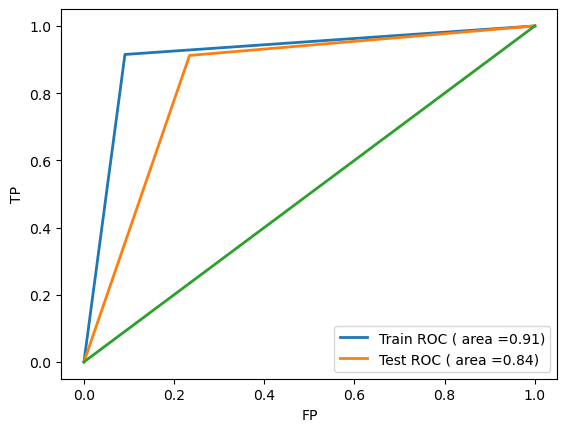

71/71 [==============================] - 5s 71ms/step


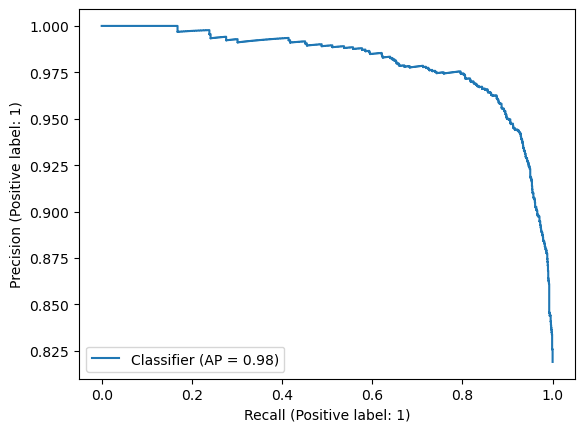

In [ ]:


    y_trian = model2.predict(X_train)>= 0.5
    y_pred = model2.predict(X_test)>= 0.5

    fprt , tprt, _  = roc_curve(y_train ,y_trian)
    vanillaT = auc(fprt,tprt)
    fprx , tprx, _  = roc_curve(y_test ,y_pred)
    vanillaX = auc(fprx,tprx)

    plt.plot(fprt,tprt,lw=2, label = f'Train ROC ( area ={vanillaT:.2f})')
    plt.plot(fprx,tprx,lw=2, label = f'Test ROC ( area ={vanillaX:.2f})')
    plt.plot([0,1],[0,1],lw=2)
    plt.xlabel("FP")
    plt.ylabel("TP")
    plt.legend(loc = "lower right")
    plt.show();

    y_pred_proba = model2.predict(X_test)
    PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)


## BERT Modeling

In [13]:
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

(…)cased/resolve/main/tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

(…)rt-base-uncased/resolve/main/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

(…)bert-base-uncased/resolve/main/vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

(…)base-uncased/resolve/main/tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [14]:
num_of_tokens = []
for toke in X:
    input_ids = tokenizer.encode(toke,add_special_tokens=True)
    num_of_tokens.append(len(input_ids))

In [15]:
np.array(num_of_tokens).max(), np.array(num_of_tokens).mean()

(162, 76.72477298234874)

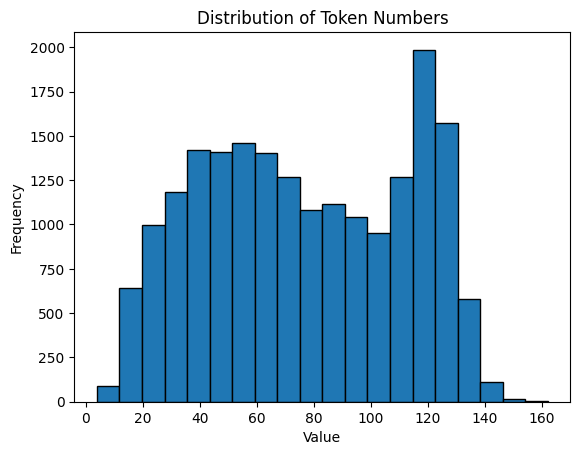

In [16]:
plt.hist(num_of_tokens, bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title("Distribution of Token Numbers")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

In [17]:
sum(np.array(num_of_tokens) <= 162) / len(num_of_tokens)

1.0

### Train test split

In [18]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,
                                                        y,
                                                        test_size=0.1,
                                                        stratify=y,
                                                        random_state=101)

### Tokenization

### Fixing token counts of all documents

In [19]:
def transformation(X):
  all_sentence_tokens = tokenizer(list(X),
                                  max_length=162,
                                  truncation=True,
                                  padding='max_length',
                                  add_special_tokens=True)

  return np.array(all_sentence_tokens['input_ids']), np.array(all_sentence_tokens['attention_mask'])

In [20]:

Xids_train, Xmask_train = transformation(X_train2)
Xids_test, Xmask_test = transformation(X_test2)

In [21]:
Xids_train.shape ,Xids_train.shape

((17641, 162), (17641, 162))

In [22]:
Xids_test.shape ,Xmask_test.shape

((1961, 162), (1961, 162))

In [23]:
np.array(y_train2)

array([1., 0., 1., ..., 1., 1., 1.])

In [24]:
labels_train = np.array(y_train2).reshape(-1,1)
labels_train

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

In [25]:
labels_test = np.array(y_test2).reshape(-1,1)
labels_test

array([[1.],
       [0.],
       [1.],
       ...,
       [1.],
       [1.],
       [1.]])

### Transformation Vectors to Matrices

### Transformation Matrix to Tensorflow tensor

In [26]:
Xids_train

array([[ 101, 1045, 3641, ...,    0,    0,    0],
       [ 101, 1045, 3641, ...,    0,    0,    0],
       [ 101, 1045, 3866, ...,    0,    0,    0],
       ...,
       [ 101, 2001, 2061, ...,    0,    0,    0],
       [ 101, 2023, 3797, ...,    0,    0,    0],
       [ 101, 1045, 4156, ...,    0,    0,    0]])

In [27]:
dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train,Xmask_train,labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>

In [28]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test,Xmask_test,labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(162,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.float64, name=None))>

In [29]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):
    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [30]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [31]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.float64, name=None))>

In [32]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(162,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(162,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.float64, name=None))>

### Batch Size

In [33]:
batch_size = 32
train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)


### Creating optimization

In [47]:

epochs = 4
steps_per_epoch = len(train_ds)

num_train_steps = steps_per_epoch * epochs
num_warmup_steps = int(0.1*num_train_steps)


In [48]:
print(len(train_ds)*2)
print(int(0.1*len(train_ds)*2))

1104
110


### Creating Model

In [60]:
def create_model():

    model = TFAutoModel.from_pretrained("bert-base-uncased")

    input_ids = Input(shape=(162,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(162,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(64, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1, name="dropout")(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)


In [61]:

optimizer = Adam(learning_rate=2e-5)
loss = BinaryCrossentropy()
recall = Recall()
model3 = create_model()
model3.compile(optimizer=optimizer, loss=loss, metrics=[recall])

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [62]:
model3.summary()

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 162)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 162)]                0         []                            
 )                                                                                                
                                                                                                  
 bert (TFBertMainLayer)      TFBaseModelOutputWithPooli   1094822   ['input_ids[0][0]',           
                             ngAndCrossAttentions(last_   40         'attention_mask[0][0]']      
                             hidden_state=(None, 162, 7                                     

### Model Fiting

In [63]:
%%time
model3.fit(train_ds, validation_data= val_ds, epochs=epochs)

Epoch 1/4
552/552 [==============================] - 649s 1s/step - loss: 0.4567 - recall_4: 0.8717 - val_loss: 0.3540 - val_recall_4: 0.9427
Epoch 2/4
552/552 [==============================] - 606s 1s/step - loss: 0.2926 - recall_4: 0.9505 - val_loss: 0.2688 - val_recall_4: 0.9745
Epoch 3/4
552/552 [==============================] - 609s 1s/step - loss: 0.2000 - recall_4: 0.9751 - val_loss: 0.3489 - val_recall_4: 0.9433
Epoch 4/4
552/552 [==============================] - 588s 1s/step - loss: 0.1416 - recall_4: 0.9870 - val_loss: 0.4306 - val_recall_4: 0.9302
CPU times: user 22min 48s, sys: 5min 21s, total: 28min 9s
Wall time: 42min 54s


### Model evaluation

In [64]:
model_his3 = pd.DataFrame(model3.history.history)
model_his3.head()

loss  recall_4  val_loss  val_recall_4
0  0.456652  0.871692  0.353988      0.942679
1  0.292567  0.950464  0.268801      0.974455
2  0.200002  0.975128  0.348940      0.943302
3  0.141573  0.986975  0.430597      0.930218

62/62 [==============================] - 22s 350ms/step


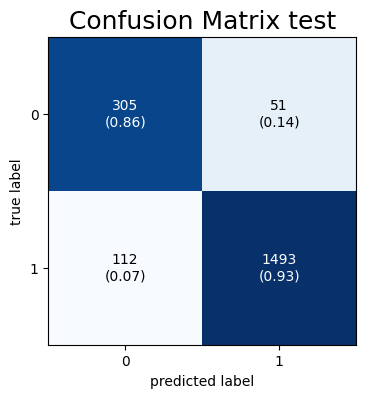

              precision    recall  f1-score   support

         0.0       0.73      0.86      0.79       356
         1.0       0.97      0.93      0.95      1605

    accuracy                           0.92      1961
   macro avg       0.85      0.89      0.87      1961
weighted avg       0.92      0.92      0.92      1961


	Train_Set



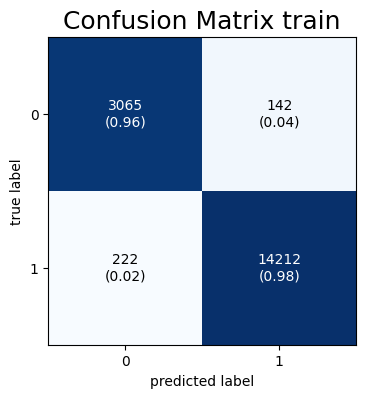

              precision    recall  f1-score   support

         0.0       0.93      0.96      0.94      3207
         1.0       0.99      0.98      0.99     14434

    accuracy                           0.98     17641
   macro avg       0.96      0.97      0.97     17641
weighted avg       0.98      0.98      0.98     17641



In [65]:
    y_train_pred = model3.predict(train_ds)>= 0.5
    y_pred = model3.predict(val_ds)>= 0.5

    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_test2, y_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix test', fontsize=18)
    plt.show()
    print(classification_report(y_test2, y_pred))
    print()

    print("\tTrain_Set\n")
    fig, ax = plot_confusion_matrix(conf_mat=confusion_matrix(y_train2, y_train_pred), show_normed = True, figsize=(4,4))
    plt.title('Confusion Matrix train', fontsize=18)
    plt.show()
    print(classification_report(y_train2, y_train_pred))

In [66]:
y_pred = model3.predict(val_ds) >= 0.5

bert_acc = accuracy_score(y_test2, y_pred)
bert_f1 = f1_score(y_test2, y_pred)
bert_pre = average_precision_score(y_test2, y_pred)
bert_rec = recall_score(y_test2, y_pred)

62/62 [==============================] - 22s 346ms/step


In [67]:
bert_acc,bert_f1,bert_pre,bert_rec

(0.9168791432942376,
 0.9482375357256272,
 0.9566056710687881,
 0.9302180685358256)

62/62 [==============================] - 22s 355ms/step


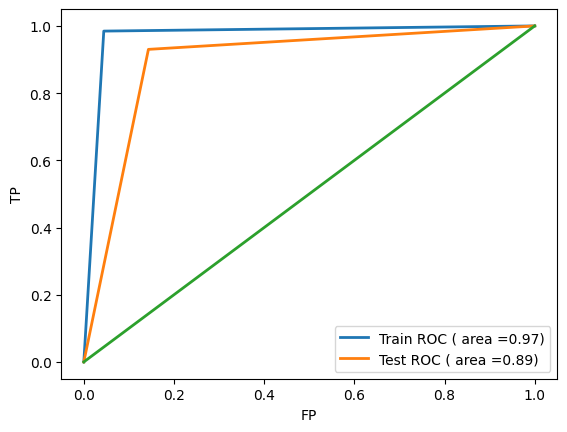

62/62 [==============================] - 22s 349ms/step


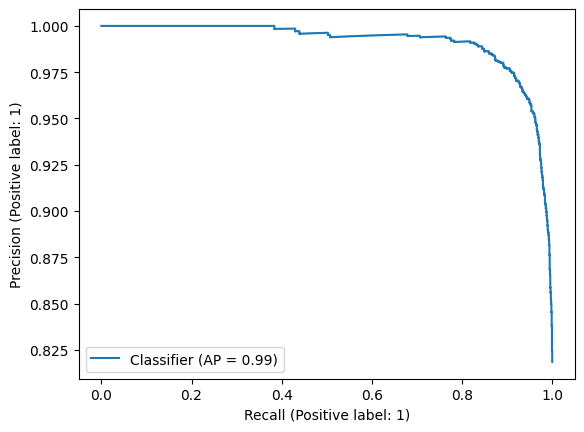

In [68]:

    y_trian = model3.predict(train_ds)>= 0.5
    y_pred = model3.predict(val_ds)>= 0.5

    fprt , tprt, _  = roc_curve(y_train2 ,y_trian)
    vanillaT = auc(fprt,tprt)
    fprx , tprx, _  = roc_curve(y_test2 ,y_pred)
    vanillaX = auc(fprx,tprx)

    plt.plot(fprt,tprt,lw=2, label = f'Train ROC ( area ={vanillaT:.2f})')
    plt.plot(fprx,tprx,lw=2, label = f'Test ROC ( area ={vanillaX:.2f})')
    plt.plot([0,1],[0,1],lw=2)
    plt.xlabel("FP")
    plt.ylabel("TP")
    plt.legend(loc = "lower right")
    plt.show();

    y_pred_proba = model3.predict(val_ds)
    PrecisionRecallDisplay.from_predictions(y_test2, y_pred_proba)


### Compare Models F1 Scores, Recall Scores Acurracy score and Average Precision Score

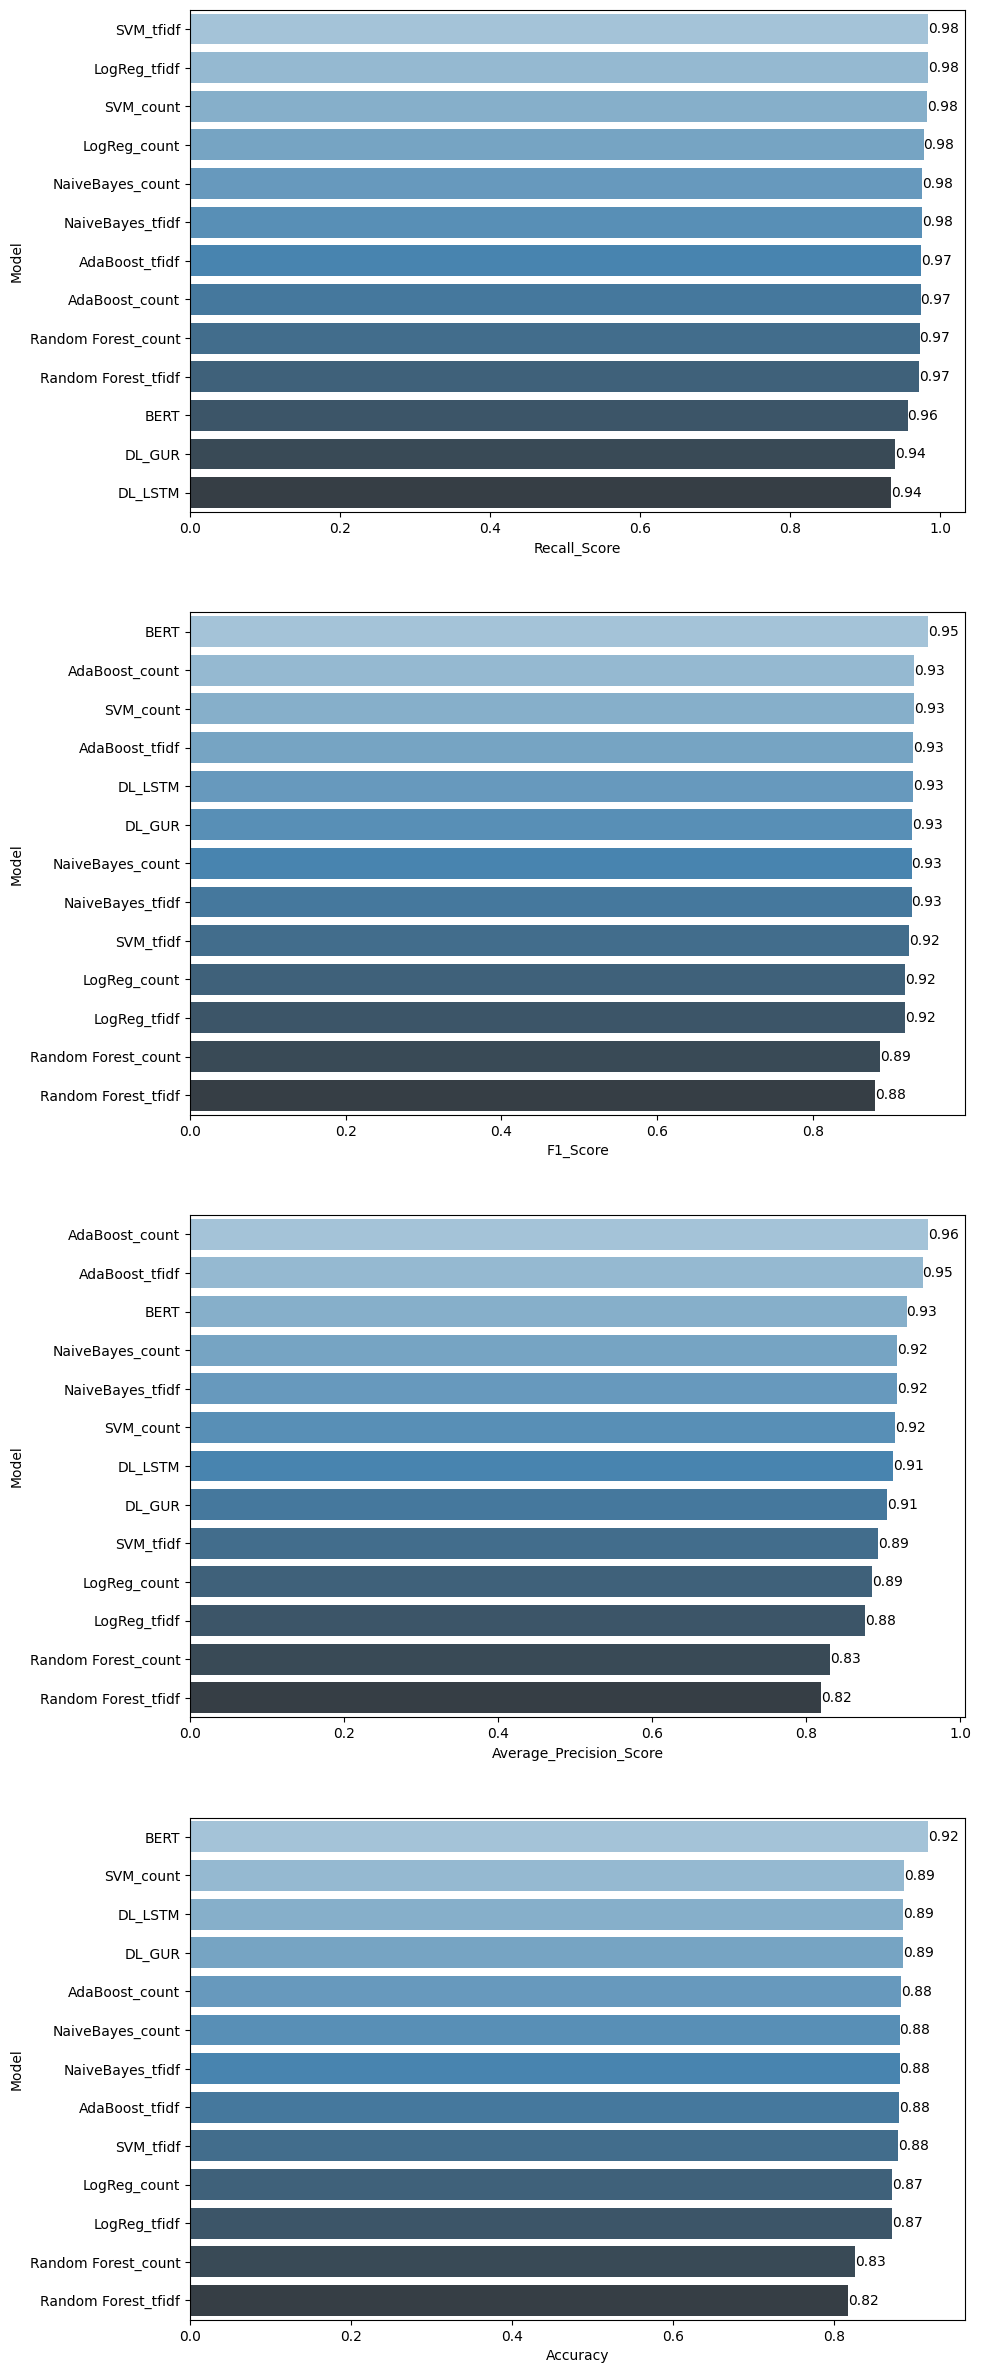

In [71]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count", "LogReg_count", "SVM_count", "Random Forest_count",
                                  "AdaBoost_count", "NaiveBayes_tfidf", "LogReg_tfidf", "SVM_tfidf",
                                  "Random Forest_tfidf", "AdaBoost_tfidf", "DL_GUR", "DL_LSTM", "BERT"],

                        "F1_Score": [nb_count_f1, log_count_f1, svm_count_f1, rf_count_f1, ada_count_f1, nb_tf_idf_f1,
                                     log_tf_idf_f1, svm_tf_idf_f1, rf_tf_idf_f1, ada_tf_idf_f1, DL_gru_f1, DL_lstm_f1,
                                     bert_f1],

                        "Recall_Score": [nb_ap_count, log_ap_count, svm_ap_count, rf_ap_count, ada_ap_count, nb_tf_idf_ap,
                                     log_tf_idf_ap, svm_tf_idf_ap, rf_tf_idf_ap, ada_tf_idf_ap, DL_gru_pre, DL_lstm_pre,
                                     bert_pre],

                        "Average_Precision_Score": [nb_count_rec, log_count_rec, svm_count_rec, rf_count_rec, ada_count_rec, nb_tf_idf_rec,
                                     log_tf_idf_rec, svm_tf_idf_rec, rf_tf_idf_rec, ada_tf_idf_rec, DL_gru_rec, DL_lstm_rec,
                                     bert_rec],

                       "Accuracy": [nb_count_acc, log_count_acc, svm_count_acc, rf_count_acc, ada_count_acc, nb_tf_idf_acc,
                                     log_tf_idf_acc, svm_tf_idf_acc, rf_tf_idf_acc, ada_tf_idf_acc, DL_gru_acc, DL_lstm_acc,
                                     bert_acc],})



plt.figure(figsize=(10,30))
plt.subplot(411)
compare = compare.sort_values(by="Recall_Score",
                              ascending=False)
ax=sns.barplot(x="Recall_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.2f")

plt.subplot(412)
compare = compare.sort_values(by="F1_Score",
                              ascending=False)
ax=sns.barplot(x="F1_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.2f")


plt.subplot(413)
compare = compare.sort_values(by="Average_Precision_Score",
                              ascending=False)
ax=sns.barplot(x="Average_Precision_Score",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.2f")

plt.subplot(414)
compare = compare.sort_values(by="Accuracy",
                              ascending=False)
ax=sns.barplot(x="Accuracy",
               y="Model",
               data=compare,
               palette="Blues_d")
ax.bar_label(ax.containers[0], fmt="%.2f")
plt.show();

### Conclusion

- for Recall best models was SVM_tfidf,LogReg_tfidf and SVM_count
- for F1_Score best models was BERT,SVM_count and AdaBoost_count
- for Average_Precision best models was BERT,AdaBoost_tfidf and AdaBoost_count
- for Acuraccy best models was BERT,SVM_count and DL_LSTM

#### BERT show good result against other.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___